## PROJECT - (16th Oct, 2020 - 01st Nov, 2020) 

In [1908]:
import pandas as pd         # To read the data set
import numpy as np          # Importing numpy library
import seaborn as sns       # For data visualization
import matplotlib.pyplot as plt      # Necessary library for plotting graphs
%matplotlib inline
sns.set(color_codes = True)

from scipy.cluster.hierarchy import dendrogram, cophenet, linkage
from sklearn.cluster import KMeans              # For KMeans cluster model building
from scipy.spatial.distance import cdist        # Importing cdist functionality for elbow graph
from scipy.spatial.distance import pdist        # Importing pdist functionality for dendrograms
from sklearn.cluster import AgglomerativeClustering             # For Agg Clust model building
from mpl_toolkits.mplot3d import Axes3D         # Importing graph library for 3D visualization
from sklearn.decomposition import PCA           # Importing to run pca analysis on data
from sklearn.model_selection import KFold, cross_val_score      # Importing kfold for cross validation
from sklearn.model_selection import GridSearchCV           # Importing for hypertuning model

from sklearn import metrics          # Importing metrics
from sklearn.model_selection import train_test_split       # Splitting data into train and test set
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix
from sklearn.svm import SVC          # For SVM model building
from sklearn.preprocessing import StandardScaler           # Importing to standardize the data
from sklearn.impute import SimpleImputer              # Importing to fill in zero values in the data
from sklearn.preprocessing import LabelEncoder        # Importing label encoder

### Loading the data set


In [1909]:
# Running steps to check and prepare the data

df = pd.read_csv('vehicle-1.csv')

### 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm


In [1910]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [1911]:
df.tail()

compactness  circularity  distance_circularity  radius_ratio  \
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio class  
841             188.0            195   car  
842             186.0            197   van  
843             187.0            201   car  
844             190.0            195   car  
845             186.0            190   van

In [1912]:
df.shape

(846, 19)

In [1913]:
df.size

16074

In [1914]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

We can notice from the above result that we have null values we need to deal with, within the data frame which we will tackle later on.

In [1915]:
df.count()

compactness                    846
circularity                    841
distance_circularity           842
radius_ratio                   840
pr.axis_aspect_ratio           844
max.length_aspect_ratio        846
scatter_ratio                  845
elongatedness                  845
pr.axis_rectangularity         843
max.length_rectangularity      846
scaled_variance                843
scaled_variance.1              844
scaled_radius_of_gyration      844
scaled_radius_of_gyration.1    842
skewness_about                 840
skewness_about.1               845
skewness_about.2               845
hollows_ratio                  846
class                          846
dtype: int64

In [1916]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [1917]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [1918]:
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [1919]:
df.skew()

compactness                    0.381271
circularity                    0.261809
distance_circularity           0.106585
radius_ratio                   0.394978
pr.axis_aspect_ratio           3.830362
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607271
elongatedness                  0.047847
pr.axis_rectangularity         0.770889
max.length_rectangularity      0.256359
scaled_variance                0.651598
scaled_variance.1              0.842034
scaled_radius_of_gyration      0.279317
scaled_radius_of_gyration.1    2.083496
skewness_about                 0.776519
skewness_about.1               0.688017
skewness_about.2               0.249321
hollows_ratio                 -0.226341
dtype: float64

### 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

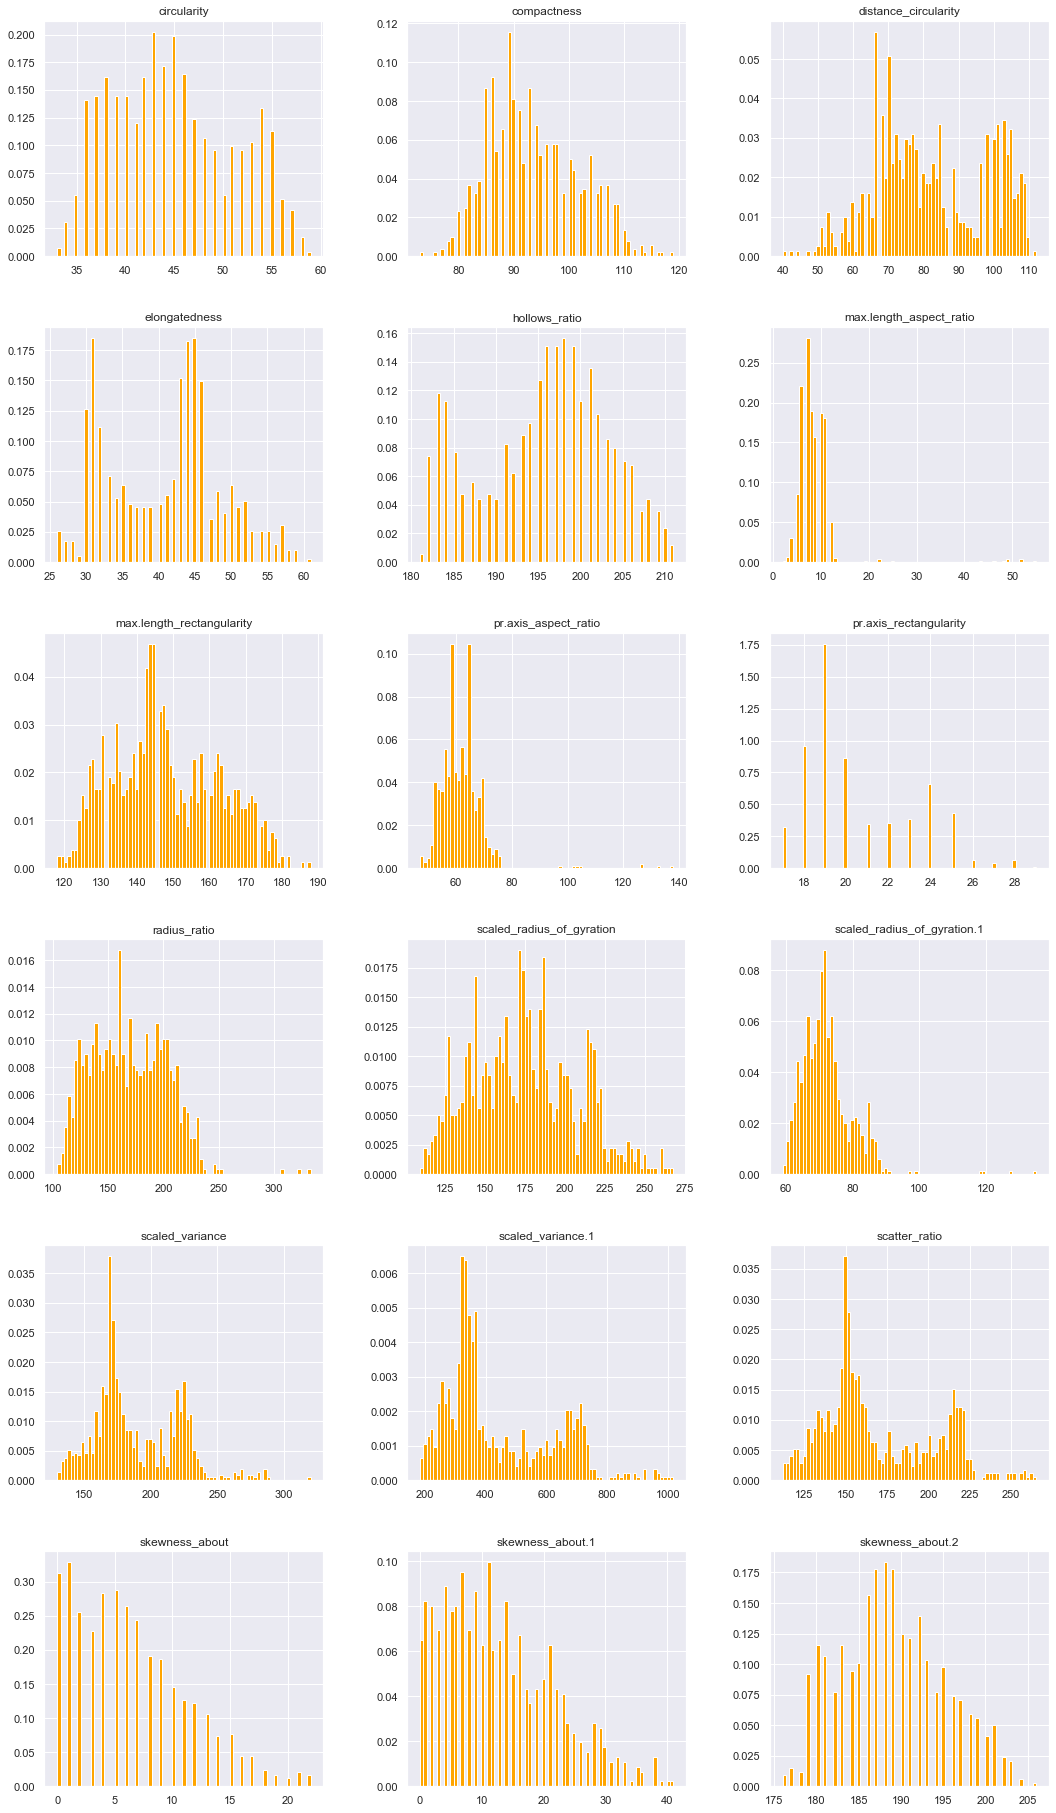

In [1920]:
columns = list(df)
df[columns].hist(stacked = True, density = True, bins = 75, color = 'Orange', layout = (10,3), figsize=(18,55));

In [1921]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

From the above histogram we can infer, independent variables in the data frame are normally distributed.

In [1922]:
dfcar = df[df['class'] == 'car']
dfbus = df[df['class'] == 'bus']
dfvan = df[df['class'] == 'van']

In [1923]:
labelencoder = LabelEncoder()
df['class'] = labelencoder.fit_transform(df['class'])
df['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

### I ) Analyzing each "Independent Variable" in the data set with "Class"

### A. Compactness v/s Class

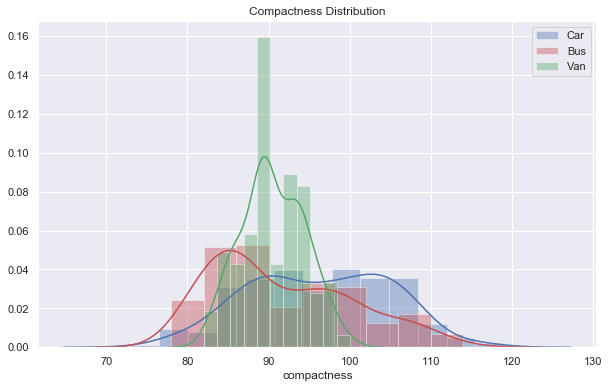

In [1924]:
# Plotting a graph for visual analysis of compactness

plt.figure(figsize=(10,6))
sns.distplot(dfcar['compactness'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['compactness'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['compactness'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('Compactness Distribution');

We can infer that the distribution of compactness for 'car' & 'bus' is more than 'van'

### B. Circularity v/s Class

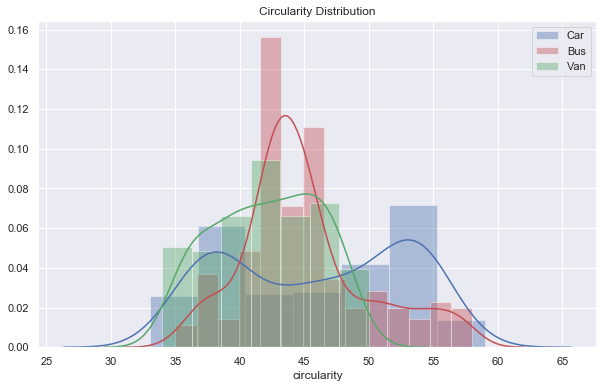

In [1925]:
# Plotting a graph for visual analysis of circularity

plt.figure(figsize=(10,6))
sns.distplot(dfcar['circularity'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['circularity'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['circularity'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('Circularity Distribution');

We can infer that the distribution of circularity for 'car' & 'bus' is more than 'van'. Here we can also notice 'bus' is almost normally distributed.

### C. Distance_Circularity v/s Class

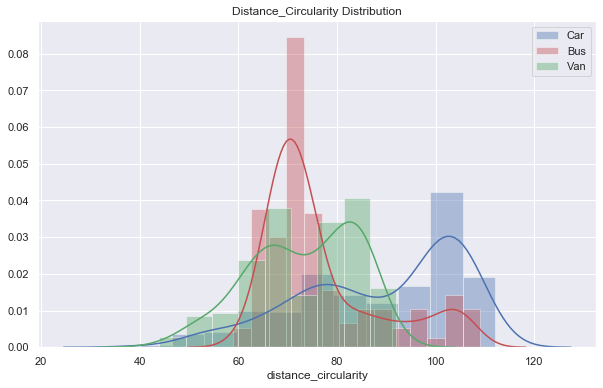

In [1926]:
# Plotting a grpah for visual analysis of distance_circularity

plt.figure(figsize=(10,6))
sns.distplot(dfcar['distance_circularity'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['distance_circularity'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['distance_circularity'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('Distance_Circularity Distribution');

We can infer that the distribution of distance_circularity for 'car' & 'bus' is more than 'van'

### D. Radius_Ratio v/s Class

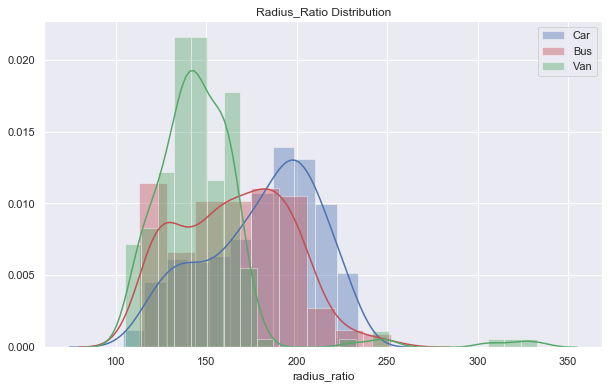

In [1927]:
# Plotting a graph for visual analysis of radius_ratio

plt.figure(figsize=(10,6))
sns.distplot(dfcar['radius_ratio'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['radius_ratio'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['radius_ratio'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('Radius_Ratio Distribution');

We can infer that the distribution of distance_circularity for 'car' & 'bus' is more than 'van'

### E. PR.Axis_Aspect_Ratio v/s Class

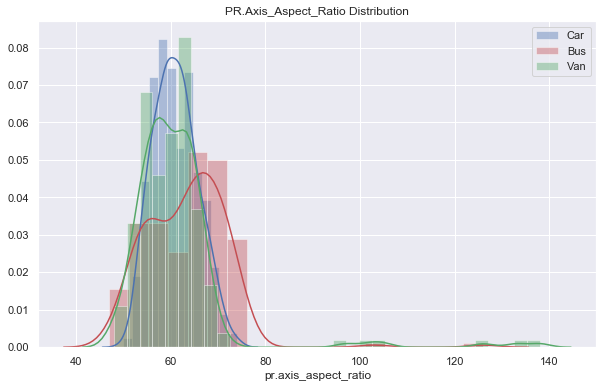

In [1928]:
# Plotting a graph for visual analysis of pr.axis_aspect_ratio

plt.figure(figsize=(10,6))
sns.distplot(dfcar['pr.axis_aspect_ratio'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['pr.axis_aspect_ratio'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['pr.axis_aspect_ratio'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('PR.Axis_Aspect_Ratio Distribution');

We can infer that the distribution of pr.axis_aspect_ratio for 'bus' is slightly higher, than compared to 'car' & 'van' which are almost identical. Both 'car' & 'van' are almost normally distributed.

### F.  Max.Length_Aspect_Ratio v/s Class

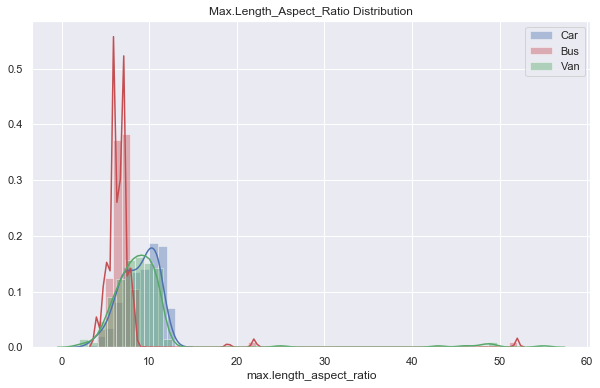

In [1929]:
# Plotting a graph for visual analysis of max.length_aspect_ratio

plt.figure(figsize=(10,6))
sns.distplot(dfcar['max.length_aspect_ratio'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['max.length_aspect_ratio'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['max.length_aspect_ratio'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('Max.Length_Aspect_Ratio Distribution');

We can infer that the distribution of max.length_aspect_ratio for 'car' & 'van' is higher and almost identical, than compared to 'bus' 

### G. Scatter_Ratio v/s Class

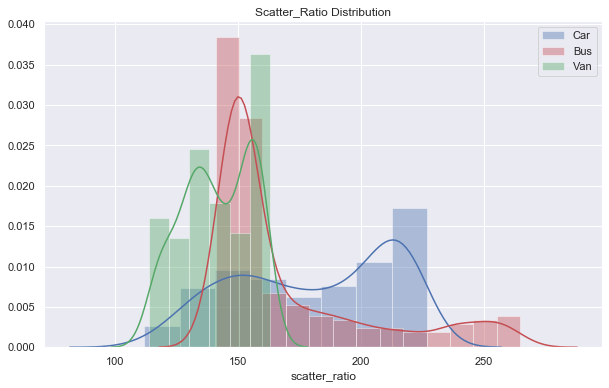

In [1930]:
# Plotting a graph for visual analysis of scatter_ratio

plt.figure(figsize=(10,6))
sns.distplot(dfcar['scatter_ratio'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['scatter_ratio'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['scatter_ratio'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('Scatter_Ratio Distribution');

We can infer that the distribution of scatter_ratio for 'bus' is the most followed by 'car and then 'van'

### H. Elongatedness v/s Class

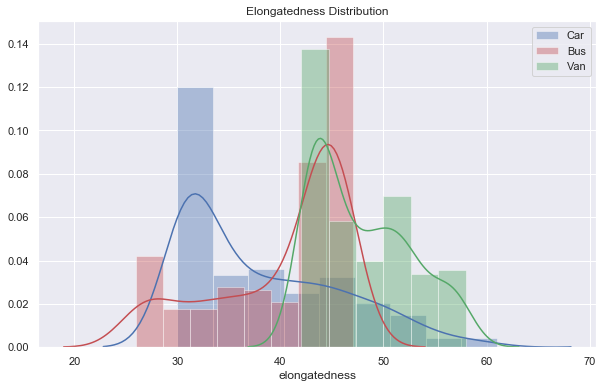

In [1931]:
# Plotting a graph for visual analysis of elongatedness

plt.figure(figsize=(10,6))
sns.distplot(dfcar['elongatedness'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['elongatedness'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['elongatedness'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('Elongatedness Distribution');

We can infer that the distribution of elongatedness for 'car' is more than that of 'bus' & 'van'

### I. PR.Axis_Rectangularity v/s Class

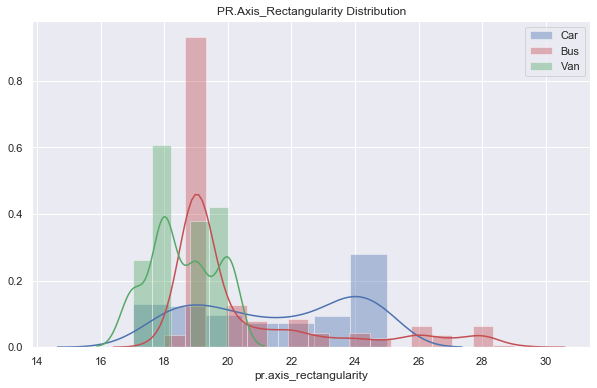

In [1932]:
# Plotting a graph for visual analysis of pr.axis_rectangularity

plt.figure(figsize=(10,6))
sns.distplot(dfcar['pr.axis_rectangularity'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['pr.axis_rectangularity'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['pr.axis_rectangularity'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('PR.Axis_Rectangularity Distribution');

We can infer that the distribution of pr.axis_rectangularity for 'bus' is more than that of 'car' & 'van'

### J. Max.Length_Rectangularity v/s Class

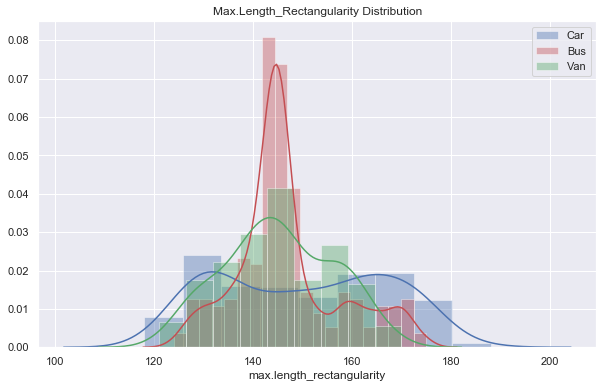

In [1933]:
# Plotting a graph for visual analysis of max.length_rectangularity

plt.figure(figsize=(10,6))
sns.distplot(dfcar['max.length_rectangularity'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['max.length_rectangularity'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['max.length_rectangularity'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('Max.Length_Rectangularity Distribution');

We can infer that the distribution of max.length_rectangularity for 'car' is more than that of 'bus' & 'van'. Here we also notice that 'bus' is almost normally distributed.

### K. Scaled_Variance v/s Class

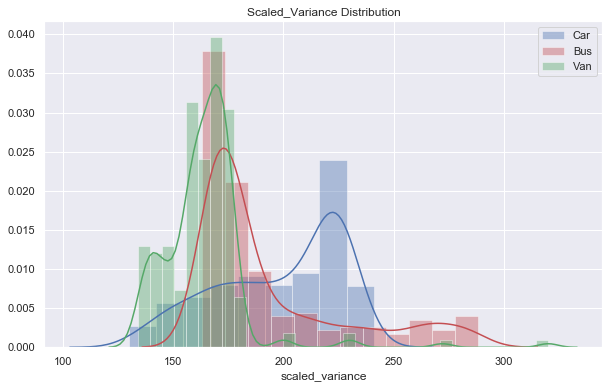

In [1934]:
# Plotting a graph for visual analysis of scaled_variance

plt.figure(figsize=(10,6))
sns.distplot(dfcar['scaled_variance'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['scaled_variance'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['scaled_variance'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('Scaled_Variance Distribution');

We can infer that the distribution of scaled_variance for 'bus' is more than that of 'car' & 'van'

### L. Scaled_Variance.1 v/s Class

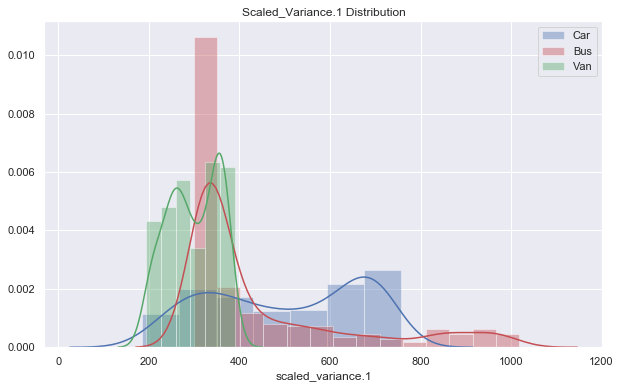

In [1935]:
# Plotting a graph for visual analysis of scaled_variance.1

plt.figure(figsize=(10,6))
sns.distplot(dfcar['scaled_variance.1'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['scaled_variance.1'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['scaled_variance.1'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('Scaled_Variance.1 Distribution');

We can infer that the distribution of scaled_variance.1 for 'bus' is more than that of 'car' & 'van'

### M. Scaled_Radius_Of_Gyration v/s Class

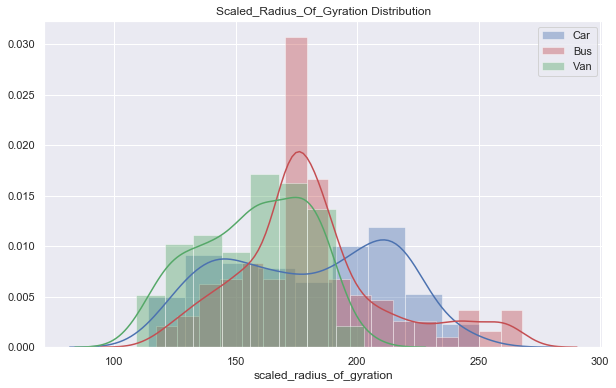

In [1936]:
# Plotting a graph for visual analysis of scaled_radius_of_gyration

plt.figure(figsize=(10,6))
sns.distplot(dfcar['scaled_radius_of_gyration'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['scaled_radius_of_gyration'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['scaled_radius_of_gyration'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('Scaled_Radius_Of_Gyration Distribution');

We can infer that the distribution of scaled_radius_of_gyration for 'bus' is more than that of 'car' & 'van'. Here we notice that 'bus' is almost normally distributed.

### N. Scaled_Radius_Of_Gyration.1 v/s Class

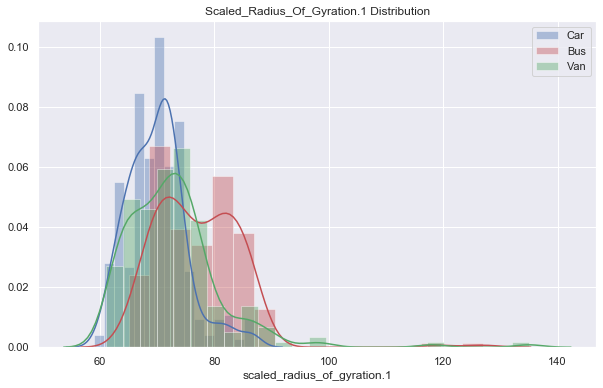

In [1937]:
# Plotting a graph for visual analysis of scaled_radius_of_gyration.1

plt.figure(figsize=(10,6))
sns.distplot(dfcar['scaled_radius_of_gyration.1'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['scaled_radius_of_gyration.1'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['scaled_radius_of_gyration.1'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('Scaled_Radius_Of_Gyration.1 Distribution');

We can infer that the distribution of scaled_radius_of_gyration.1 for 'bus' & 'van' is more and almost similar than that of 'car'.

### O. Skewness_About v/s Class

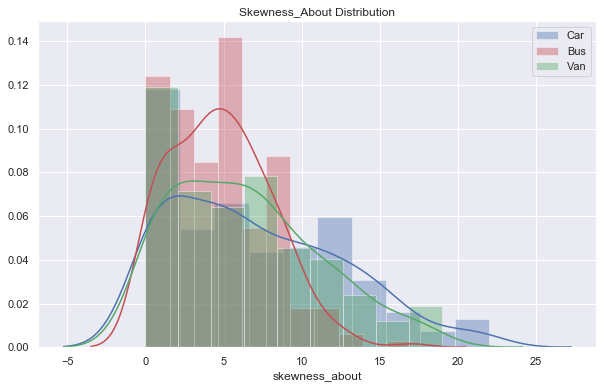

In [1938]:
# Plotting a graph for visual analysis of skewness_about

plt.figure(figsize=(10,6))
sns.distplot(dfcar['skewness_about'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['skewness_about'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['skewness_about'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('Skewness_About Distribution');

We can infer that the distribution of skewness_about for 'car' & 'van' is more and almost similar than that of 'bus'.

### P. Skewness_About .1 v/s Class

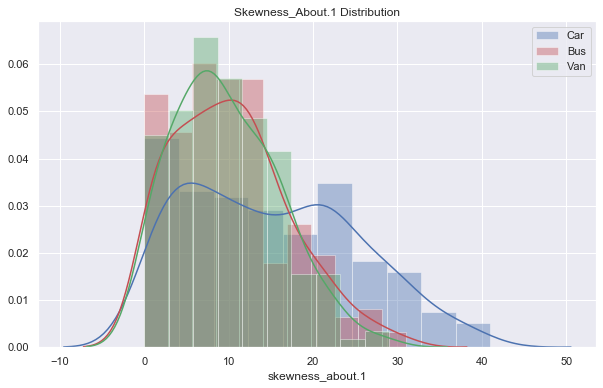

In [1939]:
# Plotting a graph for visual analysis of skewness_about.1

plt.figure(figsize=(10,6))
sns.distplot(dfcar['skewness_about.1'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['skewness_about.1'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['skewness_about.1'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('Skewness_About.1 Distribution');

We can infer that the distribution of skewness_about.1 for 'car is more than that of 'bus' & 'van' which is almost similar.


### Q. Skewness_About .2 v/s Class

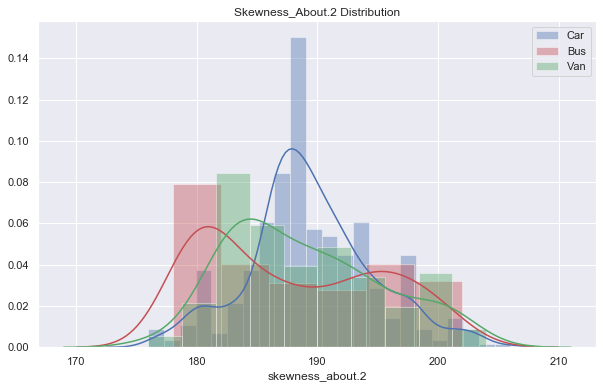

In [1940]:
# Plotting a graph for visual analysis of skewness_about.2

plt.figure(figsize=(10,6))
sns.distplot(dfcar['skewness_about.2'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['skewness_about.2'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['skewness_about.2'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('Skewness_About.2 Distribution');

We can infer that the distribution of skewness_about.2 is almost similar for 'car', 'van' & 'bus'. 


### R. Hollows_Ratio v/s Class

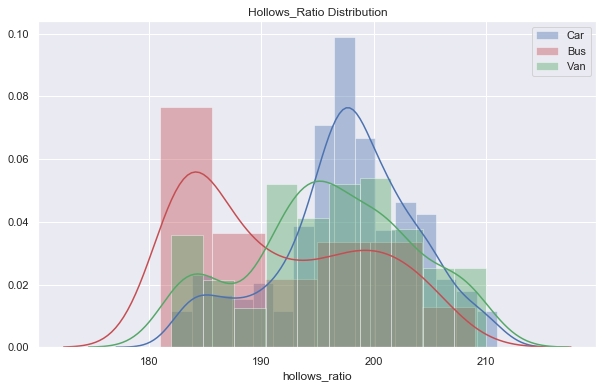

In [1941]:
# Plotting a graph for visual analysis of hollows_ratio

plt.figure(figsize=(10,6))
sns.distplot(dfcar['hollows_ratio'], kde = True, color = 'b', label = 'Car')
sns.distplot(dfbus['hollows_ratio'], kde = True, color = 'r', label = 'Bus')
sns.distplot(dfvan['hollows_ratio'], kde = True, color = 'g', label = 'Van')
plt.legend(loc='best')
plt.title('Hollows_Ratio Distribution');

We can infer that the distribution of hollows_ratio is almost similar for 'car', 'van' & 'bus'. 


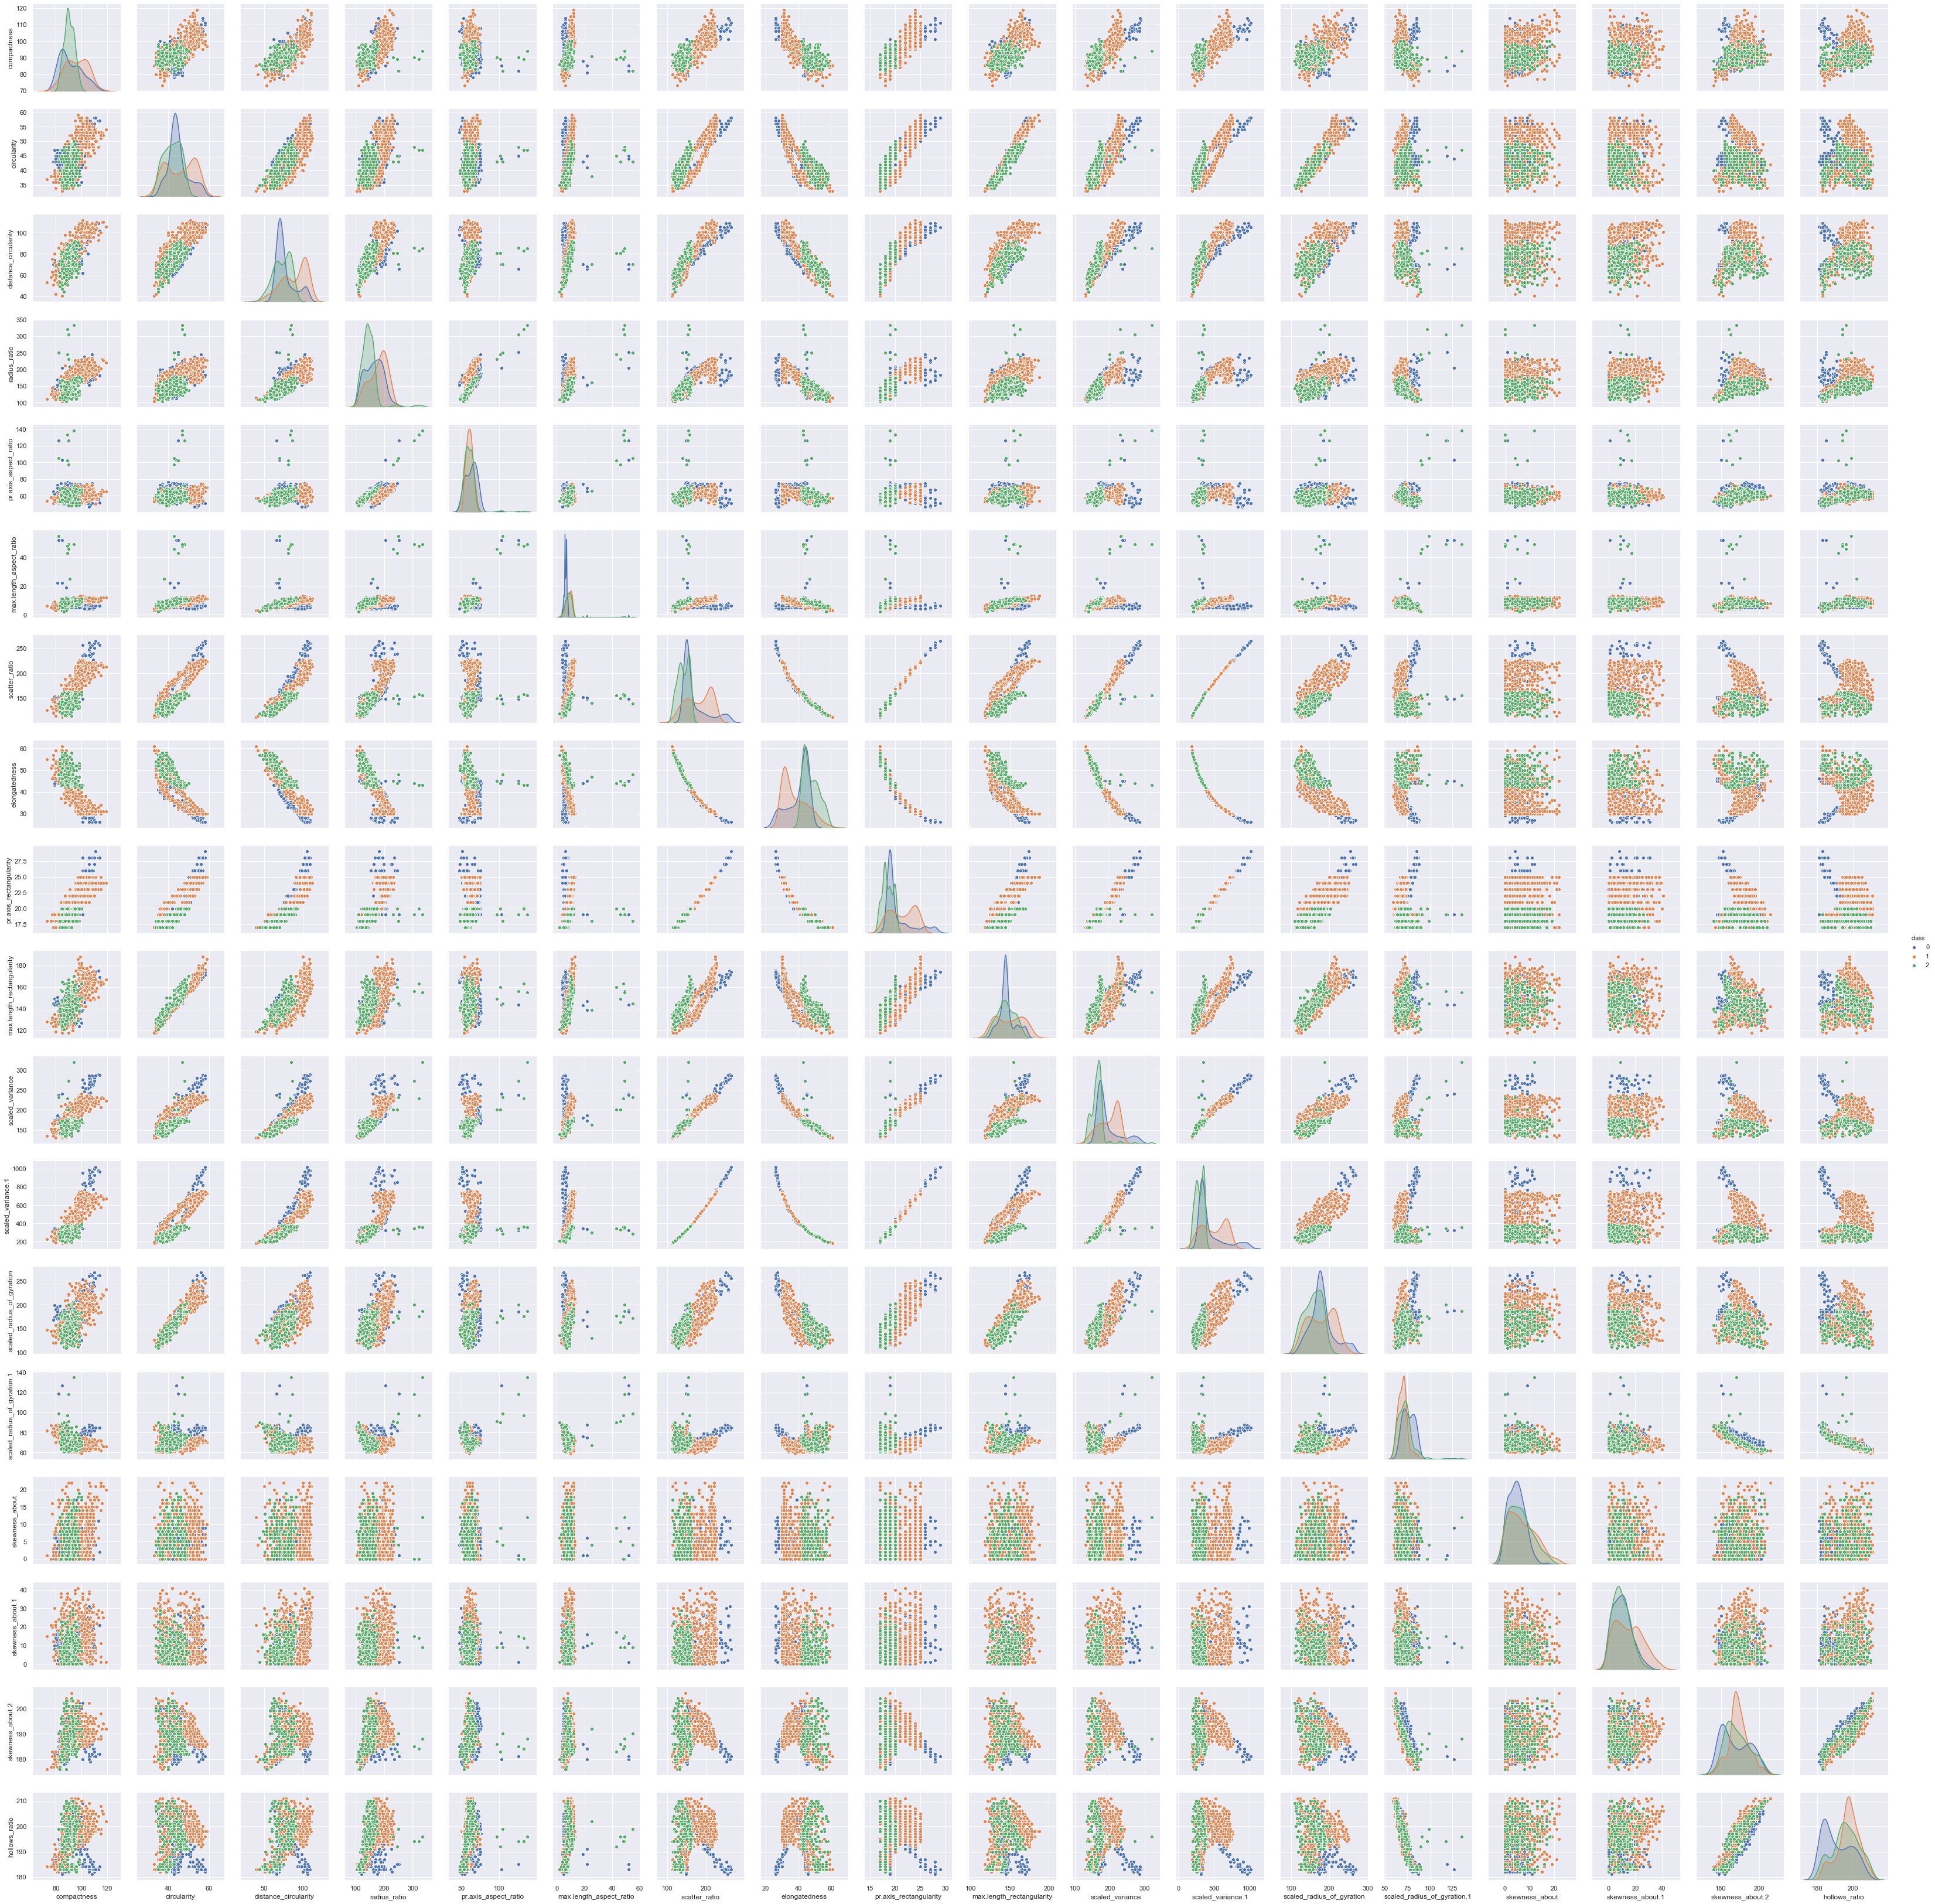

In [1942]:
# Visualizing a pair plot for the data

sns.pairplot(df, diag_kind='kde', hue = 'class');

Our Inference from the above pairplot:

1. Many columns have long tails indicating outliers


2. Many features show high correlation indicating that we need to drop multiple features - we will use PCA later on for the same

In [1943]:
df.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.689786              0.791707   
circularity                     0.689786     1.000000              0.797180   
distance_circularity            0.791707     0.797180              1.000000   
radius_ratio                    0.691081     0.625051              0.771748   
pr.axis_aspect_ratio            0.091779     0.154283              0.158684   
max.length_aspect_ratio         0.148249     0.251407              0.264621   
scatter_ratio                   0.812770     0.858265              0.907949   
elongatedness                  -0.788736    -0.827246             -0.913020   
pr.axis_rectangularity          0.814248     0.856603              0.896273   
max.length_rectangularity       0.676143     0.965729              0.775149   
scaled_variance                 0.764361     0.806791              0.865710   
scaled_variance.1               0.818674     0.850863              0.890541   
scaled_radius_of_gyration       0.585845     0.935950              0.706950   
scaled_radius_of_gyration.1    -0.250603     0.053080             -0.227001   
skewness_about                  0.236685     0.144968              0.114665   
skewness_about.1                0.157670    -0.011869              0.266049   
skewness_about.2                0.298528    -0.106339              0.146027   
hollows_ratio                   0.365552     0.045652              0.333648   
class                          -0.033796    -0.160546             -0.065209   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.691081              0.091779   
circularity                      0.625051              0.154283   
distance_circularity             0.771748              0.158684   
radius_ratio                     1.000000              0.665363   
pr.axis_aspect_ratio             0.665363              1.000000   
max.length_aspect_ratio          0.450486              0.648861   
scatter_ratio                    0.738480              0.103832   
elongatedness                   -0.792946             -0.183492   
pr.axis_rectangularity           0.712744              0.079566   
max.length_rectangularity        0.571083              0.127322   
scaled_variance                  0.798294              0.273738   
scaled_variance.1                0.725598              0.089750   
scaled_radius_of_gyration        0.541325              0.122454   
scaled_radius_of_gyration.1     -0.181520              0.152860   
skewness_about                   0.049112             -0.058539   
skewness_about.1                 0.174469             -0.032180   
skewness_about.2                 0.382912              0.240201   
hollows_ratio                    0.472339              0.267760   
class                           -0.182921             -0.098431   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812770   
circularity                                 0.251407       0.858265   
distance_circularity                        0.264621       0.907949   
radius_ratio                                0.450486       0.738480   
pr.axis_aspect_ratio                        0.648861       0.103832   
max.length_aspect_ratio                     1.000000       0.165998   
scatter_ratio                               0.165998       1.000000   
elongatedness                              -0.180053      -0.973504   
pr.axis_rectangularity                      0.161603       0.992078   
max.length_rectangularity                   0.305943       0.810017   
scaled_variance                             0.319033       0.951672   
scaled_variance.1                           0.143745       0.996328   
scaled_radius_of_gyration                   0.189752       0.800577   
scaled_radius_of_gyration.1                 0.295638      -0.028006   
skewness_about                            

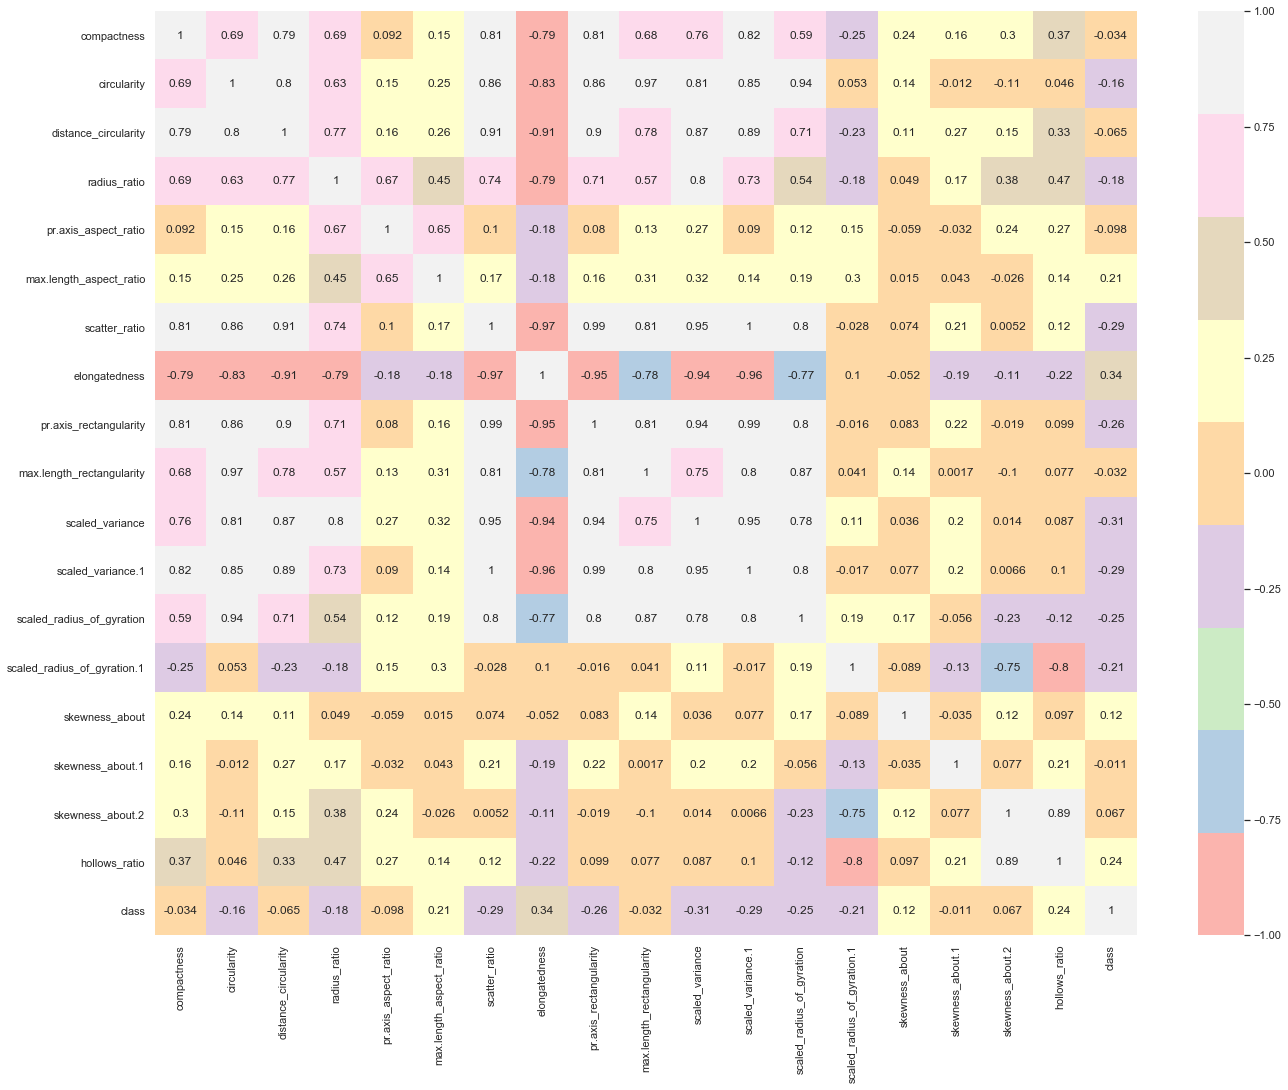

In [1944]:
# Visualizing through a graph the different correlations in the data 

plt.figure(figsize=(22,17))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'Pastel1', vmin = -1, vmax = 1);

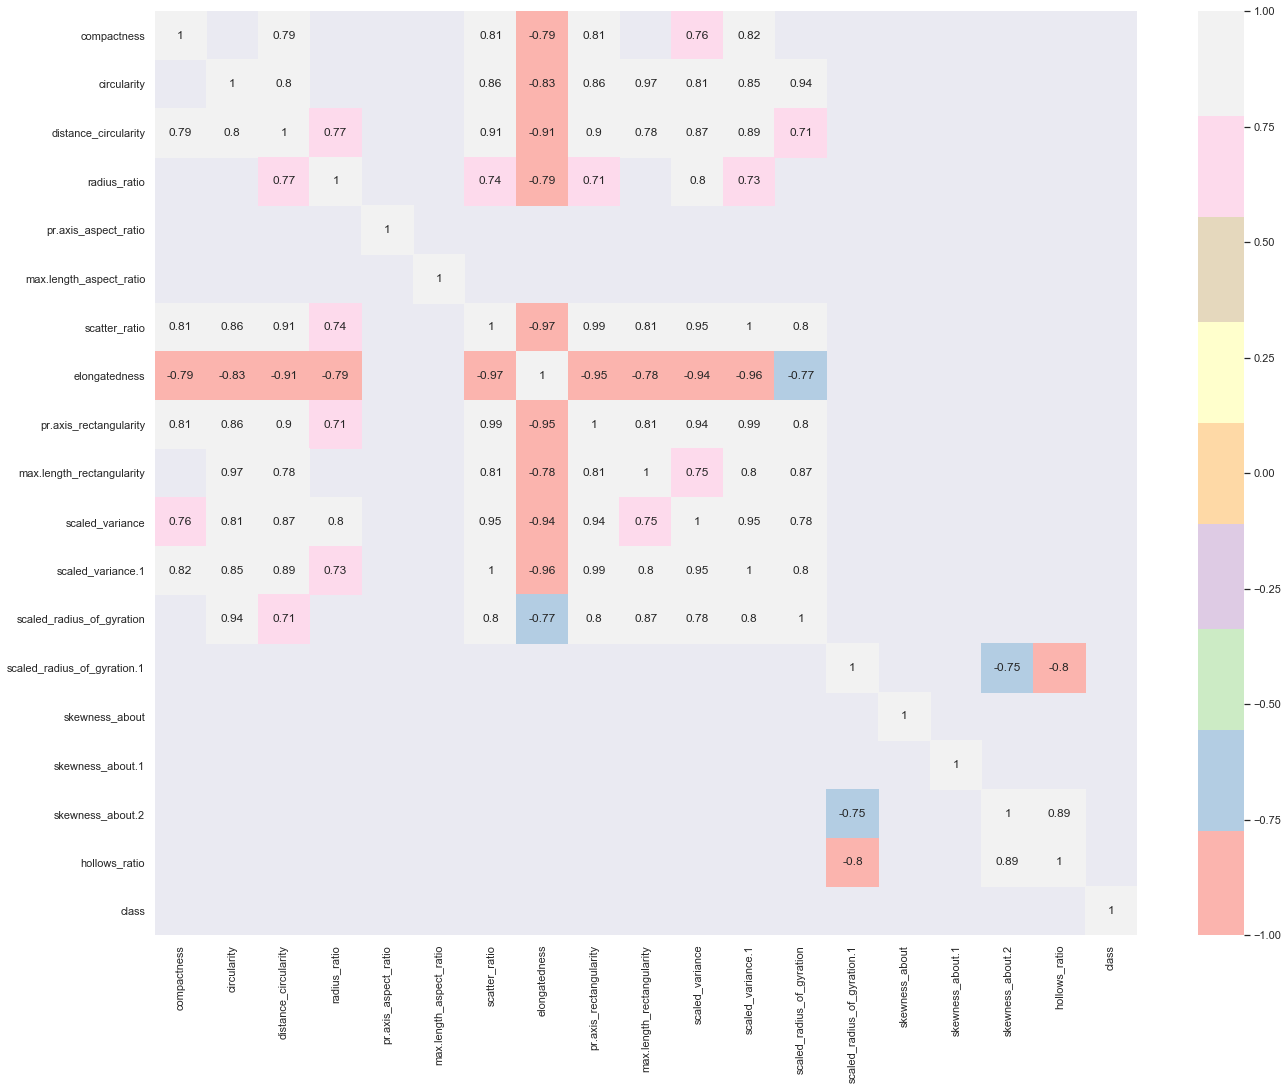

In [1945]:
# Finding highly correlated features

corr_pos = corr.abs()
mask = (corr_pos < 0.70)
fig, ax = plt.subplots(figsize=[22,17])
sns.heatmap(corr, annot = True, center = 0, vmin = -1, vmax = 1, mask = mask, cmap = 'Pastel1');

Our Inference from the above heatmap :

1. From above correlation matrix we can see that there are many features which are highly correlated. If we notice carefully scaled_variance.1 and scatter_ratio has correlation of 1, and many other features are also there which have more than (0.9 positive or negative) correlation E.g. - [sekweness_abou2 and hollows_ratio, scaled variance & scaled_variance1, elongatedness & scaled variance, elongatedness & scaled variance1 etc]


2. There are lot of dimensions with correlation above (+ - 0.7), and it is difficult to determine which dimensions to drop manually. We will use PCA later on to determine it.

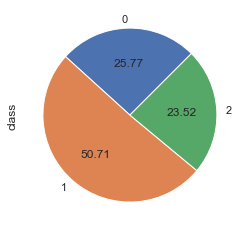

In [1946]:
dfpie = df.groupby('class')['class'].count()
dfpie.plot.pie(shadow = False, startangle = 45, autopct = '%.2f');

Our Class label of vehicle type, consists of three types (Van / Bus & Car). Among these Car's contribute to 51% of the data, Bus & Van collectively contribute 49% of data.

### II ) Fixing Missing Values in the Dataset.

In [1947]:
labelencoder = LabelEncoder()
df['class'] = labelencoder.fit_transform(df['class'])
df['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

In [1948]:
miss_values = df.columns[df.isnull().any()]
df[miss_values].isnull().sum()

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

### A. Missing Values Treatment for Circularity

In [1949]:
df[df['circularity'].isnull()][miss_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
5            NaN                 106.0         172.0                  50.0   
105          NaN                 103.0         202.0                  64.0   
118          NaN                   NaN         128.0                  56.0   
266          NaN                  65.0         116.0                  53.0   
396          NaN                 106.0         177.0                  51.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
5            255.0           26.0                    28.0            280.0   
105          220.0           30.0                    25.0              NaN   
118          150.0           46.0                    19.0            168.0   
266          152.0           45.0                    19.0            175.0   
396          256.0           26.0                    28.0            285.0   

     scaled_variance.1  scaled_radius_of_gyration  \
5                957.0                      264.0   
105              711.0                      214.0   
118              324.0                      173.0   
266              335.0                        NaN   
396              966.0                      261.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
5                           85.0             5.0               9.0   
105                         73.0            11.0               NaN   
118                         82.0             9.0              14.0   
266                         85.0             5.0               4.0   
396                         87.0            11.0               2.0   

     skewness_about.2  
5               181.0  
105             188.0  
118             180.0  
266             179.0  
396             182.0

1. 5 rows have missing vales for circularity. One of the 5 rows also has missing value for distance_circularity. 


2. Another row has missing values for scaled valiance and skewness_about.1. One of the row has missing value for scaled_radius_of_gyration.


3. We will drop those rows which has missing value in any other coulmn as well apart from circularity which is 3. We will impute missing value in remaining 2 rows.

In [1950]:
# Row 105,118,266 has missing values in more than 1 column, dropping them

df.drop([105,118,266], inplace=True)

In [1951]:
# Replacing the values with median value of the corresponding class

df.loc[5].loc['class'], df.loc[396].loc['class']

(0.0, 0.0)

In [1952]:
# Class belongs to bus

Median_circularity_bus = df['circularity'][df['class'] == 0].median()

Median_circularity_bus

44.0

In [1953]:
# Replacing NaN with median values

df['circularity'].fillna(Median_circularity_bus, inplace=True)

In [1954]:
# Double checking if missing values have been removed

df[df['circularity'].isnull()][miss_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

### B. Missing Values Treatment for Distance_Circularity

In [1955]:
df[df['distance_circularity'].isnull()][miss_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
35          46.0                   NaN         172.0                  67.0   
207         42.0                   NaN         121.0                  55.0   
319         51.0                   NaN         194.0                  60.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
35           157.0           43.0                    20.0            170.0   
207          149.0           46.0                    19.0            167.0   
319          220.0           30.0                    25.0            247.0   

     scaled_variance.1  scaled_radius_of_gyration  \
35               363.0                      184.0   
207              323.0                        NaN   
319              731.0                      209.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
35                          67.0            17.0               7.0   
207                         85.0             1.0               6.0   
319                         80.0             7.0               7.0   

     skewness_about.2  
35              192.0  
207             179.0  
319             188.0

1. 3 rows have missing values. Row 207 has missing  values in more than 1 column, we will drop this.


2. Rows 35, 319 have missing values in one column. We will fill it with median of the corresponding class.

In [1956]:
# Row 207 has missing values in more than 1 column, dropping it

df.drop(207, inplace=True)

In [1957]:
# Replacing the values with median value of the corresponding class

df.loc[35].loc['class'], df.loc[319].loc['class']

(2.0, 0.0)

In [1958]:
# Class belongs to van & bus

Median_distance_circularity_van = df['distance_circularity'][df['class'] == 2].median()
Median_distance_circularity_bus = df['distance_circularity'][df['class'] == 0].median()

Median_distance_circularity_van, Median_distance_circularity_bus

(75.0, 72.5)

In [1959]:
# Replacing NaN with median values

df.loc[35] = df.loc[35].replace(np.nan, Median_distance_circularity_van)
df.loc[319] = df.loc[319].replace(np.nan, Median_distance_circularity_bus)

In [1960]:
# Double checking if missing values have been removed

df.loc[[35,319]]

compactness  circularity  distance_circularity  radius_ratio  \
35         100.0         46.0                  75.0         172.0   
319        102.0         51.0                  72.5         194.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
35                   67.0                      9.0          157.0   
319                  60.0                      6.0          220.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
35            43.0                    20.0                      150.0   
319           30.0                    25.0                      162.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
35             170.0              363.0                      184.0   
319            247.0              731.0                      209.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
35                          67.0            17.0               7.0   
319                         80.0             7.0               7.0   

     skewness_about.2  hollows_ratio  class  
35              192.0          200.0    2.0  
319             188.0          186.0    0.0

### C. Missing Values Treatment for Radius_Ratio

In [1961]:
df[df['radius_ratio'].isnull()][miss_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
9           44.0                  98.0           NaN                  62.0   
78          52.0                  94.0           NaN                  66.0   
159         45.0                  75.0           NaN                  57.0   
287         43.0                  84.0           NaN                  55.0   
345         54.0                 106.0           NaN                  57.0   
467         54.0                 104.0           NaN                  58.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
9            183.0           36.0                    22.0            202.0   
78           208.0           31.0                    24.0            227.0   
159          150.0           44.0                    19.0            170.0   
287          154.0           44.0                    19.0            174.0   
345          236.0           28.0                    26.0            256.0   
467          215.0           31.0                    24.0            221.0   

     scaled_variance.1  scaled_radius_of_gyration  \
9                505.0                      152.0   
78               666.0                      218.0   
159              335.0                      180.0   
287              350.0                      164.0   
345              833.0                      253.0   
467              682.0                      222.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
9                           64.0             4.0              14.0   
78                          76.0            11.0               4.0   
159                         66.0            16.0               2.0   
287                         73.0             6.0               2.0   
345                         81.0             6.0              14.0   
467                         75.0            13.0              23.0   

     skewness_about.2  
9               195.0  
78              193.0  
159             193.0  
287             185.0  
345             185.0  
467             186.0

Only radius ratio is having missing values, all the other columns do not have missing values. We will not drop any rather replace with median of corresponding class.

In [1962]:
# Replacing the values with median value of the corresponding class

df.loc[[9,78,159,287,345,467]]['class']

9      1.0
78     0.0
159    1.0
287    2.0
345    0.0
467    1.0
Name: class, dtype: float64

In [1963]:
# Class belongs to car, bus & van

Median_radius_ratio_car = df['radius_ratio'][df['class'] == 1].median()
Median_radius_ratio_bus = df['radius_ratio'][df['class'] == 0].median()
Median_radius_ratio_van = df['radius_ratio'][df['class'] == 2].median()

Median_radius_ratio_car, Median_radius_ratio_bus, Median_radius_ratio_van

(186.0, 169.0, 144.0)

In [1964]:
# Replacing NaN with median values of car, for rows (9,159,467)

df.loc[[9,159,467]] = df.loc[[9,159,467]].replace(np.nan, Median_radius_ratio_car)

In [1965]:
# Double checking if missing values have been removed

df.loc[[9,159,467]]

compactness  circularity  distance_circularity  radius_ratio  \
9           93.0         44.0                  98.0         186.0   
159         91.0         45.0                  75.0         186.0   
467         96.0         54.0                 104.0         186.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
9                    62.0                     11.0          183.0   
159                  57.0                      6.0          150.0   
467                  58.0                     10.0          215.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
9             36.0                    22.0                      146.0   
159           44.0                    19.0                      146.0   
467           31.0                    24.0                      175.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
9              202.0              505.0                      152.0   
159            170.0              335.0                      180.0   
467            221.0              682.0                      222.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
9                           64.0             4.0              14.0   
159                         66.0            16.0               2.0   
467                         75.0            13.0              23.0   

     skewness_about.2  hollows_ratio  class  
9               195.0          204.0    1.0  
159             193.0          198.0    1.0  
467             186.0          194.0    1.0

In [1966]:
# Replacing NaN with median value of bus, for rows (78,345)

df.loc[[78,345]] = df.loc[[78,345]].replace(np.nan, Median_radius_ratio_bus)

In [1967]:
# Double checking if missing values have been removed

df.loc[[78,345]]

compactness  circularity  distance_circularity  radius_ratio  \
78         104.0         52.0                  94.0         169.0   
345        101.0         54.0                 106.0         169.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
78                   66.0                      5.0          208.0   
345                  57.0                      7.0          236.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
78            31.0                    24.0                      161.0   
345           28.0                    26.0                      164.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
78             227.0              666.0                      218.0   
345            256.0              833.0                      253.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
78                          76.0            11.0               4.0   
345                         81.0             6.0              14.0   

     skewness_about.2  hollows_ratio  class  
78              193.0          191.0    0.0  
345             185.0          185.0    0.0

In [1968]:
# Replacing NaN with median values of van, for row (287)

df.loc[287] = df.loc[287].replace(np.nan, Median_radius_ratio_van)

In [1969]:
# Double checking if missing values have been removed

df.loc[[287]]

compactness  circularity  distance_circularity  radius_ratio  \
287         88.0         43.0                  84.0         144.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
287                  55.0                     11.0          154.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
287           44.0                    19.0                      150.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
287            174.0              350.0                      164.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
287                         73.0             6.0               2.0   

     skewness_about.2  hollows_ratio  class  
287             185.0          196.0    2.0

### D. Missing Values Treatment for PR.Axis_Aspect_Ratio

In [1970]:
df[df['pr.axis_aspect_ratio'].isnull()][miss_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
19          56.0                 100.0         215.0                   NaN   
222         50.0                  81.0         197.0                   NaN   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
19           208.0           32.0                    24.0            227.0   
222          186.0           34.0                    22.0            206.0   

     scaled_variance.1  scaled_radius_of_gyration  \
19               651.0                      223.0   
222              531.0                      198.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
19                          74.0             6.0               5.0   
222                         74.0             NaN               1.0   

     skewness_about.2  
19              186.0  
222             197.0

1. There are 2 rows with missing values. One row has missing value in one more column in addition to pr.axis_aspect_ratio. 

2. We will drop that row but treat the missing value in pr.axis_aspect_ratio with median of corresponding class

In [1971]:
# Row 222 has missing values in more than 1 column, dropping it

df.drop(222, inplace=True)

In [1972]:
# Replacing the values with median value of the corresponding class

df.loc[19].loc['class']

1.0

In [1973]:
# Class belongs to car

Median_pr_axis_aspect_ratio_car = df['pr.axis_aspect_ratio'][df['class'] == 1].median()

Median_pr_axis_aspect_ratio_car

61.0

In [1974]:
# Replacing NaN with median values

df.loc[19] = df.loc[19].replace(np.nan, Median_pr_axis_aspect_ratio_car)

In [1975]:
# Double checking if missing values have been removed

df[df['pr.axis_aspect_ratio'].isnull()][miss_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

### E. Missing Values Treatment for Scatter_Ratio

In [1976]:
df[df['scatter_ratio'].isnull()][miss_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
249         34.0                  53.0         127.0                  58.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
249            NaN           58.0                    17.0            137.0   

     scaled_variance.1  scaled_radius_of_gyration  \
249              197.0                      127.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
249                         70.0             NaN              20.0   

     skewness_about.2  
249             185.0

Only one row and 2 columns have missing value in that row including scatter_ratio hence we will drop this row.

In [1977]:
# Row 249 has missing values in more than 1 column, dropping it

df.drop(249, inplace = True)

### F. Missing Values Treatment for Elongatedness

In [1978]:
df[df['elongatedness'].isnull()][miss_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
215         39.0                  86.0         169.0                  62.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
215          162.0            NaN                    20.0            194.0   

     scaled_variance.1  scaled_radius_of_gyration  \
215              388.0                      147.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
215                         74.0             1.0              22.0   

     skewness_about.2  
215             185.0

We will treat the missing value in elongatedness with median of corresponding class

In [1979]:
# Replacing the values with median value of the corresponding class

df.loc[215].loc['class']

1.0

In [1980]:
# Class belongs to car

Median_elongatedness_car = df['elongatedness'][df['class'] == 1].median()

Median_elongatedness_car

36.0

In [1981]:
# Replacing NaN with median values

df.loc[215] = df.loc[215].replace(np.nan, Median_elongatedness_car)

In [1982]:
# Double checking if missing values have been removed

df[df['elongatedness'].isnull()][miss_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

### G. Missing Values Treatment for PR.Axis_Rectangularity

In [1983]:
df[df['pr.axis_rectangularity'].isnull()][miss_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
70          55.0                  98.0         161.0                  54.0   
237         45.0                  65.0         128.0                  56.0   
273         45.0                  80.0         162.0                  63.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
70           215.0           31.0                     NaN            226.0   
237          151.0           45.0                     NaN            170.0   
273          146.0           46.0                     NaN            161.0   

     scaled_variance.1  scaled_radius_of_gyration  \
70               683.0                      221.0   
237              332.0                      186.0   
273              316.0                      161.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
70                          76.0             3.0               6.0   
237                         81.0             1.0              10.0   
273                         64.0             5.0              10.0   

     skewness_about.2  
70              185.0  
237             179.0  
273             199.0

We will treat the missing value in pr.axis_rectangularity with median of corresponding class

In [1984]:
# Replacing the values with median value of the corresponding class

df.loc[[70,237,273]]['class']

70     1.0
237    0.0
273    2.0
Name: class, dtype: float64

In [1985]:
# Class belongs to car, bus & van

Median_pr_axis_rectangularity_car = df['pr.axis_rectangularity'][df['class'] == 1].median()
Median_pr_axis_rectangularity_bus = df['pr.axis_rectangularity'][df['class'] == 0].median()
Median_pr_axis_rectangularity_van = df['pr.axis_rectangularity'][df['class'] == 2].median()

Median_pr_axis_rectangularity_car, Median_pr_axis_rectangularity_bus, Median_pr_axis_rectangularity_van

(22.0, 19.0, 18.0)

In [1986]:
# Replacing NaN with median value of car, for row (70)

df.loc[70] = df.loc[70].replace(np.nan, Median_pr_axis_rectangularity_car)

In [1987]:
# Double checking if missing values have been removed

df[df['pr.axis_rectangularity'].isnull()][miss_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
237         45.0                  65.0         128.0                  56.0   
273         45.0                  80.0         162.0                  63.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
237          151.0           45.0                     NaN            170.0   
273          146.0           46.0                     NaN            161.0   

     scaled_variance.1  scaled_radius_of_gyration  \
237              332.0                      186.0   
273              316.0                      161.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
237                         81.0             1.0              10.0   
273                         64.0             5.0              10.0   

     skewness_about.2  
237             179.0  
273             199.0

In [1988]:
# Replacing NaN with median value of bus, for row (237)

df.loc[237] = df.loc[237].replace(np.nan, Median_pr_axis_rectangularity_bus)

In [1989]:
# Double checking if missing values have been removed

df[df['pr.axis_rectangularity'].isnull()][miss_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
273         45.0                  80.0         162.0                  63.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
273          146.0           46.0                     NaN            161.0   

     scaled_variance.1  scaled_radius_of_gyration  \
273              316.0                      161.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
273                         64.0             5.0              10.0   

     skewness_about.2  
273             199.0

In [1990]:
# Replacing NaN with median value of van, for row (273)

df.loc[273] = df.loc[273].replace(np.nan, Median_pr_axis_rectangularity_van)

In [1991]:
# Double checking if missing values have been removed

df[df['pr.axis_rectangularity'].isnull()][miss_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

### H. Missing Values Treatment for Scaled_Variance

In [1992]:
df[df['scaled_variance'].isnull()][miss_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
372         47.0                  87.0         164.0                  64.0   
522         36.0                  69.0         162.0                  63.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
372          156.0           43.0                    20.0              NaN   
522          140.0           48.0                    18.0              NaN   

     scaled_variance.1  scaled_radius_of_gyration  \
372              359.0                      182.0   
522              291.0                      126.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
372                         68.0             1.0              13.0   
522                         66.0             1.0              38.0   

     skewness_about.2  
372             192.0  
522             193.0

We will treat the missing value in scaled_variance with median of corresponding class

In [1993]:
# Replacing the values with median value of the corresponding class

df.loc[372].loc['class'], df.loc[522].loc['class']

(2.0, 1.0)

In [1994]:
# Class belongs to car & van

Median_scaled_variance_car = df['scaled_variance'][df['class'] == 1].median()
Median_scaled_variance_van = df['scaled_variance'][df['class'] == 2].median()

Median_scaled_variance_car, Median_scaled_variance_van

(206.5, 164.0)

In [1995]:
# Replacing NaN with median value of car, for row (522)

df.loc[522] = df.loc[522].replace(np.nan, Median_scaled_variance_car)

In [1996]:
# Double checking if missing values have been removed

df[df['scaled_variance'].isnull()][miss_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
372         47.0                  87.0         164.0                  64.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
372          156.0           43.0                    20.0              NaN   

     scaled_variance.1  scaled_radius_of_gyration  \
372              359.0                      182.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
372                         68.0             1.0              13.0   

     skewness_about.2  
372             192.0

In [1997]:
# Replacing NaN with median value of van, for row (372)

df.loc[372] = df.loc[372].replace(np.nan, Median_scaled_variance_van)

In [1998]:
# Double checking if missing values have been removed

df[df['scaled_variance'].isnull()][miss_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

### I. Missing Values Treatment for Scaled_Variance.1

In [1999]:
df[df['scaled_variance.1'].isnull()][miss_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
308         51.0                 100.0         197.0                  59.0   
496         55.0                  98.0         224.0                  68.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
308          192.0           34.0                    22.0            210.0   
496          215.0           31.0                    24.0            222.0   

     scaled_variance.1  scaled_radius_of_gyration  \
308                NaN                      195.0   
496                NaN                      214.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
308                         64.0            14.0               3.0   
496                         68.0             2.0              29.0   

     skewness_about.2  
308             196.0  
496             189.0

We will treat the missing value in scaled_variance.1 with median of corresponding class

In [2000]:
# Replacing the values with median value of the corresponding class

df.loc[308].loc['class'], df.loc[496].loc['class']

(1.0, 1.0)

In [2001]:
# Class belongs to car 

Median_scaled_variance1_car = df['scaled_variance.1'][df['class'] == 1].median()

Median_scaled_variance1_car

512.0

In [2002]:
# Replacing NaN with median values

df['scaled_variance.1'].fillna(Median_scaled_variance1_car, inplace = True)

In [2003]:
# Double checking if missing values have been removed

df[df['scaled_variance.1'].isnull()][miss_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

### J. Missing Values Treatment for Scaled_Radius_Of_Gyration

In [2004]:
df[df['scaled_radius_of_gyration'].isnull()][miss_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

There are no missing values in scaled_radius_of_gyration

### K. Missing Values Treatment for Scaled_Radius_Of_Gyration.1

In [2005]:
df[df['scaled_radius_of_gyration.1'].isnull()][miss_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
66          43.0                  68.0         125.0                  57.0   
77          40.0                  62.0         140.0                  62.0   
192         43.0                  76.0         149.0                  57.0   
329         38.0                  80.0         169.0                  59.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
66           149.0           46.0                    19.0            169.0   
77           150.0           45.0                    19.0            165.0   
192          149.0           44.0                    19.0            172.0   
329          161.0           41.0                    20.0            186.0   

     scaled_variance.1  scaled_radius_of_gyration  \
66               323.0                      172.0   
77               330.0                      173.0   
192              335.0                      176.0   
329              389.0                      137.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
66                           NaN             NaN              18.0   
77                           NaN             2.0               3.0   
192                          NaN            14.0               0.0   
329                          NaN             5.0              15.0   

     skewness_about.2  
66              179.0  
77              180.0  
192             189.0  
329             192.0

1. There are 4  rows with scaled_radius_of_gyration.1 as missing values. Row 66 has missing values in 2 columns hence will be dropped.


2. Other 3 rows missing values will be replaced with median value of corresponding class

In [2006]:
# Row 66 has missing values in more than 1 column, dropping it

df.drop(66, inplace = True)

In [2007]:
# Replacing the values with median value of the corresponding class

df.loc[[77, 192, 329]]['class']

77     1.0
192    1.0
329    1.0
Name: class, dtype: float64

In [2008]:
# Class belongs to car 

Median_scaled_radius_of_gyration1_car = df['scaled_radius_of_gyration.1'][df['class'] == 1].median()

Median_scaled_radius_of_gyration1_car

70.0

In [2009]:
# Replacing NaN with median values

df['scaled_radius_of_gyration.1'].fillna(Median_scaled_radius_of_gyration1_car, inplace = True)

In [2010]:
# Double checking if missing values have been removed

df[df['scaled_radius_of_gyration.1'].isnull()][miss_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

### L. Missing Values Treatment for Skewness_About

In [2011]:
df[df['skewness_about'].isnull()][miss_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
141         42.0                  63.0         125.0                  55.0   
177         44.0                  72.0         160.0                  66.0   
285         48.0                  85.0         189.0                  64.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
141          149.0           46.0                    19.0            166.0   
177          144.0           46.0                    19.0            166.0   
285          169.0           39.0                    20.0            188.0   

     scaled_variance.1  scaled_radius_of_gyration  \
141              320.0                      172.0   
177              312.0                      169.0   
285              427.0                      190.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
141                         86.0             NaN               7.0   
177                         69.0             NaN               1.0   
285                         64.0             NaN               5.0   

     skewness_about.2  
141             179.0  
177             191.0  
285             195.0

We will treat the missing value in skewness_about with median of corresponding class

In [2012]:
# Replacing the values with median value of the corresponding class

df.loc[[141,177,285]]['class']

141    0.0
177    0.0
285    1.0
Name: class, dtype: float64

In [2013]:
# Class belongs to car & bus

Median_skewness_about_car = df['skewness_about'][df['class'] == 1].median()
Median_skewness_about_bus = df['skewness_about'][df['class'] == 0].median()

Median_skewness_about_car, Median_skewness_about_bus

(6.0, 5.0)

In [2014]:
# Replacing NaN with median value of bus, for row (141,177)

df.loc[[141,177]] = df.loc[[141,177]].replace(np.nan, Median_skewness_about_bus)

In [2015]:
# Double checking if missing values have been removed

df[df['skewness_about'].isnull()][miss_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
285         48.0                  85.0         189.0                  64.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
285          169.0           39.0                    20.0            188.0   

     scaled_variance.1  scaled_radius_of_gyration  \
285              427.0                      190.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
285                         64.0             NaN               5.0   

     skewness_about.2  
285             195.0

In [2016]:
# Replacing NaN with median value of car, for row (285)

df.loc[285] = df.loc[285].replace(np.nan, Median_skewness_about_car)

In [2017]:
# Double checking if missing values have been removed

df[df['skewness_about'].isnull()][miss_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

### M. Missing Values Treatment for Skewness_About.1

In [2018]:
df[df['skewness_about.1'].isnull()][miss_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

There are no missing values in skewness_about.1

### N. Missing Values Treatment for Skewness_About.2

In [2019]:
df[df['skewness_about.2'].isnull()][miss_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
419         34.0                  72.0         144.0                  56.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
419          133.0           50.0                    18.0            158.0   

     scaled_variance.1  scaled_radius_of_gyration  \
419              263.0                      125.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
419                         63.0             5.0              20.0   

     skewness_about.2  
419               NaN

We will treat the missing value in skewness_about.2 with median of corresponding class

In [2020]:
# Replacing the values with median value of the corresponding class

df.loc[419].loc['class']

1.0

In [2021]:
# Class belongs to car

Median_skewness_about2_car = df['skewness_about.2'][df['class'] == 1].median() 

Median_skewness_about2_car

189.0

In [2022]:
# Replacing NaN with median values

df['skewness_about.2'].fillna(Median_skewness_about2_car, inplace = True)

In [2023]:
# Double checking if missing values have been removed

df[df['skewness_about.2'].isnull()][miss_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

### III ) Fixing Outliers in the Dataset.

In [2024]:
def outliers_transform_with_replace_mean(base_dataset):
    num_features=[col for col in base_dataset.select_dtypes(np.number).columns ]
    print("Outliers in Dataset before Treatment")
    print("====================================")
    for i,cols in enumerate(num_features,start=1):
        x = base_dataset[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        count=(base_dataset[base_dataset[cols]>utv][cols].count())+(base_dataset[base_dataset[cols]<ltv][cols].count()) 
        print("Column ",cols,"\t has ",count," outliers")
        
    for i,cols in enumerate(num_features,start=1):
        x = base_dataset[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        for p in x:
            if p <ltv or p>utv:
                y.append(np.mean(x))
            else:
                y.append(p)
        base_dataset[cols]=y
                
    print("\nOutliers in Dataset after Treatment")
    print("====================================")
    for i,cols in enumerate(num_features,start=1):
        x = base_dataset[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        count=(base_dataset[base_dataset[cols]>utv][cols].count())+(base_dataset[base_dataset[cols]<ltv][cols].count()) 
        print("Column ",cols,"\t has ",count," outliers")

In [2025]:
outliers_transform_with_replace_mean(df)

Outliers in Dataset before Treatment
Column  compactness 	 has  1  outliers
Column  circularity 	 has  0  outliers
Column  distance_circularity 	 has  0  outliers
Column  radius_ratio 	 has  3  outliers
Column  pr.axis_aspect_ratio 	 has  8  outliers
Column  max.length_aspect_ratio 	 has  13  outliers
Column  scatter_ratio 	 has  0  outliers
Column  elongatedness 	 has  0  outliers
Column  pr.axis_rectangularity 	 has  0  outliers
Column  max.length_rectangularity 	 has  0  outliers
Column  scaled_variance 	 has  1  outliers
Column  scaled_variance.1 	 has  2  outliers
Column  scaled_radius_of_gyration 	 has  0  outliers
Column  scaled_radius_of_gyration.1 	 has  15  outliers
Column  skewness_about 	 has  12  outliers
Column  skewness_about.1 	 has  1  outliers
Column  skewness_about.2 	 has  0  outliers
Column  hollows_ratio 	 has  0  outliers
Column  class 	 has  0  outliers

Outliers in Dataset after Treatment
Column  compactness 	 has  0  outliers
Column  circularity 	 has  0  outl

So by now we analyze each column and find that there are outliers in some columns. Our next step is to know whether these outliers are natural or artificial. If natural then we have to do nothing but if these outliers are artificial, we need to tackle them.

After seeing the max values of above outliers columns, it looks like outliers in above columns are natural not a typing error mistake or artificial. 

Note: It is entirely my assumption on how i have wished to interpret it, as there is no way to prove whether these outliers are natural or artificial. We know that mostly algorithms are affected by outliers and outliers may affect our model buidling activity. When we build our SVM on the above data it is affected by outliers hence it is better to drop those outliers, like we have done above.

In [2026]:
df['class'].value_counts()

1.0    427
0.0    213
2.0    199
Name: class, dtype: int64

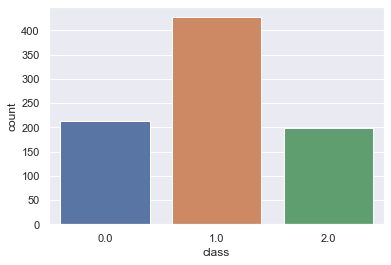

In [2027]:
# Visualizing new value counts of class field

sns.countplot(df['class'])
plt.show()

From above we can see that cars are most followed by bus and then vans.

### 3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn)

In [2028]:
# Train & Test split

x = df.drop('class', axis=1)      # Dropping field from independent variables
y = df[['class']]

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size=0.30)

In [2063]:
# Checking the split data, into train and test set

print('{0:0.2f}% Data Training Set'.format((len(x_train)/len(df.index))*100))
print('{0:0.2f}% Data Testing Set'. format((len(x_test)/len(df.index))*100))

69.96% Data Training Set
30.04% Data Testing Set


In [2030]:
x.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0             72.000000                10.000000          162.0   
1             57.000000                 9.000000          149.0   
2             66.000000                10.000000          207.0   
3             63.000000                 9.000000          144.0   
4             61.710369                 8.578069          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    70.000000             6.0              16.0   
1                    72.000000             9.0              14.0   
2                    73.000000            14.0               9.0   
3                    63.000000             6.0              10.0   
4                    72.398093             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0          197.0  
1             189.0          199.0  
2             188.0          196.0  
3             199.0          207.0  
4             180.0          183.0

In [2031]:
x_train.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   587.000000   587.000000            587.000000    587.000000   
mean     93.544649    44.766610             82.145656    168.559175   
std       8.235171     6.111733             15.585435     31.435153   
min      73.000000    33.000000             40.000000    110.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      92.000000    44.000000             80.000000    169.000000   
75%      99.000000    49.000000             98.000000    194.000000   
max     116.000000    59.000000            112.000000    252.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            587.000000               587.000000     587.000000   
mean              61.237737                 8.074318     169.110733   
std                5.546475                 2.011245      32.742292   
min               47.000000                 3.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max               76.000000                13.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     587.000000              587.000000                 587.000000   
mean       40.792164               20.591141                 147.708688   
std         7.680329                2.558488                  14.379972   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 136.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 186.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count        587.00000         587.000000                 587.000000   
mean         189.00895         439.654281                 175.022147   
std           30.77803         172.428087                  32.752946   
min          130.00000         184.000000                 109.000000   
25%          168.00000         320.000000                 149.000000   
50%          179.00000         366.000000                 174.000000   
75%          216.50000         583.500000                 199.000000   
max          285.00000         966.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   587.000000      587.000000        587.000000   
mean                     72.063000        6.214923         12.839212   
std                       6.212156        4.578042          9.257132   
min                      60.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      72.000000        5.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                      87.000000       19.000000         40.000000   

       skewness_about.2  hollows_ratio  
count        587.000000     587.000000  
mean         188.913118     195.587734  
std            6.178042       7.484025  
min          176.000000     181.000000  
25%          185.000000     190.000000  
50%          189.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [2032]:
x_train.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

### 4. Train a Support vector machine using the train set and get the accuracy on the test set

### A. SVM Model Building On Raw Data.

### 1. Linear Model Building

In [2033]:
svmlin = SVC(C = 7, gamma = 0.015, kernel = 'linear', random_state=1)
svmlin.fit(x_train, y_train.values.ravel())           # Fitting model on training data

SVC(C=7, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.015, kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [2034]:
svmlin.score(x_train, y_train)      # Training data score

0.9676320272572402

In [2035]:
svmlin.score(x_test, y_test)        # Test data score

0.9523809523809523

In [2036]:
ypred = svmlin.predict(x_test)
svmlin_acc = accuracy_score(y_test, ypred)       # Getting accuracy score of model on test data 
svmlin_conf = confusion_matrix(y_test, ypred)    # Visualizing confusion matrix of the model   
svmlin_class = classification_report(y_test, ypred)        # Visualizing classification report of the model

In [2037]:
print('The Accuracy Score of the model is {0:.2f}%'. format(svmlin_acc*100))
print()
print('The Confusion Matrix of the model is :\n', svmlin_conf)
print()
print('The Classification Report of the model is :\n', svmlin_class)

The Accuracy Score of the model is 95.24%

The Confusion Matrix of the model is :
 [[ 52   0   0]
 [  4 122   3]
 [  3   2  66]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        52
         1.0       0.98      0.95      0.96       129
         2.0       0.96      0.93      0.94        71

    accuracy                           0.95       252
   macro avg       0.94      0.96      0.95       252
weighted avg       0.96      0.95      0.95       252



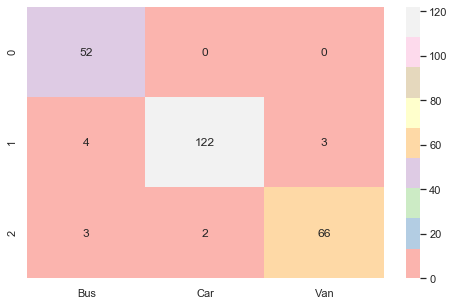

In [2172]:
# Plotting confusion matrix graphically

cm = metrics.confusion_matrix(y_test, ypred, labels=[0,1,2])
df_cm = pd.DataFrame(cm, index = [i for i in ['0','1','2']],
                    columns = [i for i in ['Bus','Car','Van']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm, annot=True, cmap = 'Pastel1', fmt = 'g');

### 2. RBF Model Building

In [2039]:
svmrbf = SVC(C = 2, gamma = 0.001, kernel = 'rbf', random_state=1)
svmrbf.fit(x_train, y_train.values.ravel())         # Fitting model on training data 

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [2040]:
svmrbf.score(x_train, y_train)        # Training data score

0.9948892674616695

In [2041]:
svmrbf.score(x_test, y_test)          # Testing data score

0.9246031746031746

In [2042]:
ypre = svmrbf.predict(x_test)
svmrbf_acc = accuracy_score(y_test, ypre)        # Getting accuracy score of model on test data
svmrbf_conf = confusion_matrix(y_test, ypre)     # Visualizing confusion matrix of the model
svmrbf_class = classification_report(y_test, ypre)       # Visualizing classification report of the model

In [2164]:
print('The Accuracy Score of the model is {0:.2f}%'. format(svmrbf_acc*100))
print()
print('The Confusion Matrix of the model is :\n', svmrbf_conf)
print()
print('The Classification Report of the model is :\n', svmrbf_class)

The Accuracy Score of the model is 92.46%

The Confusion Matrix of the model is :
 [[ 45   6   1]
 [  1 121   7]
 [  2   2  67]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.94      0.87      0.90        52
         1.0       0.94      0.94      0.94       129
         2.0       0.89      0.94      0.92        71

    accuracy                           0.92       252
   macro avg       0.92      0.92      0.92       252
weighted avg       0.93      0.92      0.92       252



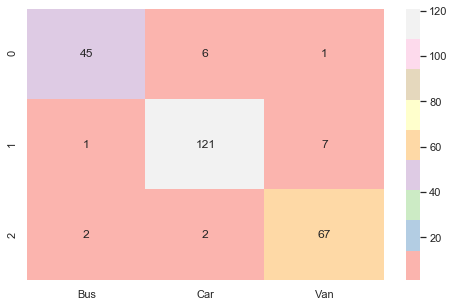

In [2171]:
# Plotting confusion matrix graphically

cm1 = metrics.confusion_matrix(y_test, ypre, labels=[0,1,2])
df_cm1 = pd.DataFrame(cm1, index = [i for i in ['0','1','2']],
                    columns = [i for i in ['Bus','Car','Van']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm1, annot=True, cmap = 'Pastel1', fmt = 'g');

### 3. Poly Model Building

In [2053]:
svmpoly = SVC(C = 1, gamma = 0.020, kernel = 'poly', random_state = 1)
svmpoly.fit(x_train, y_train.values.ravel())          # Fitting model on training data        

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.02, kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [2054]:
svmpoly.score(x_train, y_train)       # Training data score

1.0

In [2055]:
svmpoly.score(x_test, y_test)         # Testing data score

0.9523809523809523

In [2056]:
ypr = svmpoly.predict(x_test)
svmpoly_acc = accuracy_score(y_test, ypr)        # Getting accuracy score of model on test data
svmpoly_conf = confusion_matrix(y_test, ypr)     # Visualizing confusion matrix of the model
svmpoly_class = classification_report(y_test, ypr)      # Visualizing classification score of the model       

In [2168]:
print('The Accuracy Score of the model is {0:.2f}%'. format(svmpoly_acc*100))
print()
print('The Confusion Matrix of the model is :\n', svmpoly_conf)
print()
print('The Classification Report of the model is :\n', svmpoly_class)

The Accuracy Score of the model is 95.24%

The Confusion Matrix of the model is :
 [[ 51   1   0]
 [  1 123   5]
 [  1   4  66]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        52
         1.0       0.96      0.95      0.96       129
         2.0       0.93      0.93      0.93        71

    accuracy                           0.95       252
   macro avg       0.95      0.95      0.95       252
weighted avg       0.95      0.95      0.95       252



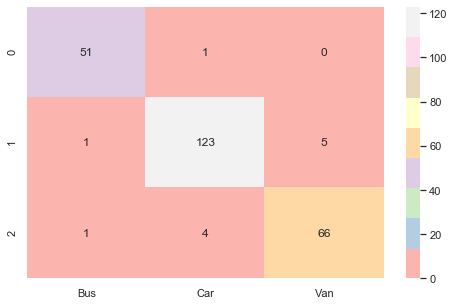

In [2327]:
# Plotting confusion matrix graphically

cm2 = metrics.confusion_matrix(y_test, ypr, labels=[0,1,2])
df_cm2 = pd.DataFrame(cm2, index = [i for i in ['0','1','2']],
                    columns = [i for i in ['Bus','Car','Van']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm2, annot=True, cmap = 'Pastel1', fmt = 'g');

### 5. Perform K-fold cross validation and get the cross validation score of the model

### B. K-FOLD Model Building On Raw Data.

### 1. K-Fold on Linear SVM

In [2058]:
kfold = KFold(n_splits=10, random_state=1, shuffle = True)      

svm = SVC(kernel = 'linear')       # Setting the model to perform k-fold on

res = cross_val_score(estimator = svm, X = x_train, y = y_train.values.ravel(), cv = kfold)     # Training model on raw data

print(res,'\n')
print('Kfold Accuracy Raw Data:{}'.format(res.mean()*100))
print('Kfold Score STD Raw Data:{}'.format(res.std()*100))
print()
print("Accuracy Raw Data: %0.2f (+/- %0.2f)" % (res.mean()*100, res.std()*100 * 2))

[0.93220339 0.91525424 0.94915254 0.93220339 0.96610169 0.93220339
 0.94915254 0.87931034 0.87931034 0.9137931 ] 

Kfold Accuracy Raw Data:92.48684979544124
Kfold Score STD Raw Data:2.7216166296946285

Accuracy Raw Data: 92.49 (+/- 5.44)


### 2. K-Fold on RBF SVM

In [2059]:
kfold = KFold(n_splits=10, random_state=1, shuffle = True)      

svm = SVC(kernel = 'rbf')       # Setting the model to perform k-fold on

result = cross_val_score(estimator = svm, X = x_train, y = y_train.values.ravel(), cv = kfold)     # Training model on raw data

print(result,'\n')
print('Kfold Accuracy Raw Data:{}'.format(result.mean()*100))
print('Kfold Score STD Raw Data:{}'.format(result.std()*100))
print()
print("Accuracy Raw Data: %0.2f (+/- %0.2f)" % (result.mean()*100, result.std()*100 * 2))

[0.6779661  0.62711864 0.45762712 0.57627119 0.74576271 0.74576271
 0.6779661  0.70689655 0.75862069 0.67241379] 

Kfold Accuracy Raw Data:66.46405610753945
Kfold Score STD Raw Data:8.733075585905569

Accuracy Raw Data: 66.46 (+/- 17.47)


### 3. K-Fold on Poly SVM

In [2060]:
kfold = KFold(n_splits = 10, random_state = 1, shuffle = True)

svm = SVC(kernel = 'poly')

result1 = cross_val_score(estimator = svm, X = x_train, y = y_train.values.ravel(), cv = kfold)     # Training model on raw data

print(result1, '\n')
print('Kfold Accuracy Raw Data :{}'.format(result1.mean()*100))
print('Kfold Score STD Raw Data :{}'.format(result1.std()*100))
print()
print('Accuracy Raw Data: %0.2f (+/- %0.2f)' % (result1.mean()*100, result1.std()*100*2))

[0.76271186 0.6779661  0.52542373 0.6440678  0.77966102 0.77966102
 0.74576271 0.74137931 0.79310345 0.72413793] 

Kfold Accuracy Raw Data :71.73874926943309
Kfold Score STD Raw Data :7.794191913686004

Accuracy Raw Data: 71.74 (+/- 15.59)


### C. SVM Model Building On Scaled Data.

In [2117]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_sd = sc.fit_transform(x)     # Fitting training data on scaled object

In [2118]:
x_train, x_test, y_train, y_test = train_test_split(x_sd, y, random_state=1, test_size=0.30)

In [2119]:
# Checking the split data, into train and test set

print('{0:0.2f}% Data Training Set'.format((len(x_train)/len(df.index))*100))
print('{0:0.2f}% Data Testing Set'.format((len(x_test)/len(df.index))*100))

69.96% Data Training Set
30.04% Data Testing Set


In [2120]:
x_train.dtype

dtype('float64')

### 1. Linear Model Building

In [2182]:
svmlin1 = SVC(C = 8, gamma = 0.025, kernel = 'linear', random_state=1)
svmlin1.fit(x_train, y_train.values.ravel())           # Fitting model on training data

SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [2183]:
svmlin1.score(x_train, y_train)      # Training data score

0.9625212947189097

In [2184]:
svmlin1.score(x_test, y_test)        # Testing data score

0.9563492063492064

In [2160]:
y_pred = svmlin1.predict(x_test)
svmlin1_acc = accuracy_score(y_test, y_pred)       # Getting accuracy score of model on test data 
svmlin1_conf = confusion_matrix(y_test, y_pred)    # Visualizing confusion matrix of the model   
svmlin1_class = classification_report(y_test, y_pred)        # Visualizing classification report of the model

In [2161]:
print('The Accuracy Score of the model is {0:.2f}%'. format(svmlin1_acc*100))
print()
print('The Confusion Matrix of the model is :\n', svmlin1_conf)
print()
print('The Classification Report of the model is :\n', svmlin1_class)

The Accuracy Score of the model is 95.63%

The Confusion Matrix of the model is :
 [[ 51   1   0]
 [  4 121   4]
 [  0   2  69]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95        52
         1.0       0.98      0.94      0.96       129
         2.0       0.95      0.97      0.96        71

    accuracy                           0.96       252
   macro avg       0.95      0.96      0.96       252
weighted avg       0.96      0.96      0.96       252



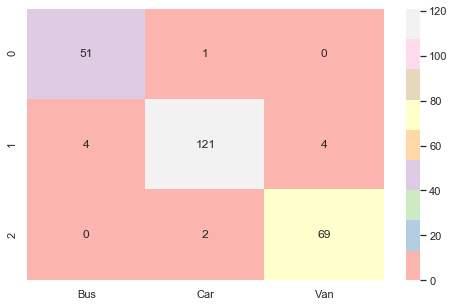

In [2426]:
# Plotting confusion matrix graphically

cm3 = metrics.confusion_matrix(y_test, y_pred, labels=[0,1,2])
df_cm3 = pd.DataFrame(cm3, index = [i for i in ['0','1','2']],
                    columns = [i for i in ['Bus','Car','Van']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm3, annot=True, cmap = 'Pastel1', fmt = 'g');

### 2. RBF Model Building

In [2249]:
svmrbf1 = SVC(C = 8, gamma = 0.035, kernel = 'rbf', random_state=1)
svmrbf1.fit(x_train, y_train.values.ravel())         # Fitting model on training data 

SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.035, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [2250]:
svmrbf1.score(x_train, y_train)        # Training data score

0.989778534923339

In [2251]:
svmrbf1.score(x_test, y_test)          # Testing data score

0.9761904761904762

In [2252]:
y_pre = svmrbf1.predict(x_test)
svmrbf1_acc = accuracy_score(y_test, y_pre)        # Getting accuracy score of model on test data
svmrbf1_conf = confusion_matrix(y_test, y_pre)     # Visualizing confusion matrix of the model
svmrbf1_class = classification_report(y_test, y_pre)       # Visualizing classification report of the model

In [2253]:
print('The Accuracy Score of the model is {0:.2f}%'. format(svmrbf1_acc*100))
print()
print('The Confusion Matrix of the model is :\n', svmrbf1_conf)
print()
print('The Classification Report of the model is :\n', svmrbf1_class)

The Accuracy Score of the model is 97.62%

The Confusion Matrix of the model is :
 [[ 51   1   0]
 [  1 124   4]
 [  0   0  71]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        52
         1.0       0.99      0.96      0.98       129
         2.0       0.95      1.00      0.97        71

    accuracy                           0.98       252
   macro avg       0.97      0.98      0.98       252
weighted avg       0.98      0.98      0.98       252



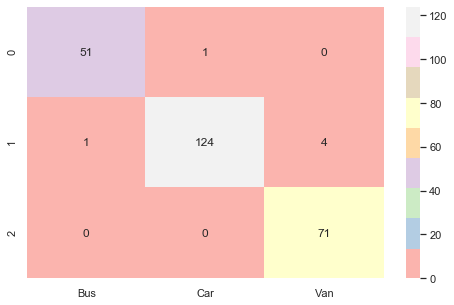

In [2254]:
# Plotting confusion matrix graphically

cm4 = metrics.confusion_matrix(y_test, y_pre, labels=[0,1,2])
df_cm4 = pd.DataFrame(cm4, index = [i for i in ['0','1','2']],
                    columns = [i for i in ['Bus','Car','Van']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm4, annot=True, cmap = 'Pastel1', fmt = 'g');

### 3. Poly Model Building

In [2321]:
svmpoly1 = SVC(C = 200, gamma = 0.025, kernel = 'poly', random_state = 1)
svmpoly1.fit(x_train, y_train.values.ravel())          # Fitting model on training data        

SVC(C=200, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [2322]:
svmpoly1.score(x_train, y_train)       # Training data score

0.9948892674616695

In [2323]:
svmpoly1.score(x_test, y_test)        # Testing data score

0.9722222222222222

In [2324]:
y_pr = svmpoly1.predict(x_test)
svmpoly1_acc = accuracy_score(y_test, y_pr)        # Getting accuracy score of model on test data
svmpoly1_conf = confusion_matrix(y_test, y_pr)     # Visualizing confusion matrix of the model
svmpoly1_class = classification_report(y_test, y_pr)      # Visualizing classification score of the model       

In [2325]:
print('The Accuracy Score of the model is {0:.2f}%'. format(svmpoly1_acc*100))
print()
print('The Confusion Matrix of the model is :\n', svmpoly1_conf)
print()
print('The Classification Report of the model is :\n', svmpoly1_class)

The Accuracy Score of the model is 97.22%

The Confusion Matrix of the model is :
 [[ 51   1   0]
 [  1 125   3]
 [  1   1  69]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        52
         1.0       0.98      0.97      0.98       129
         2.0       0.96      0.97      0.97        71

    accuracy                           0.97       252
   macro avg       0.97      0.97      0.97       252
weighted avg       0.97      0.97      0.97       252



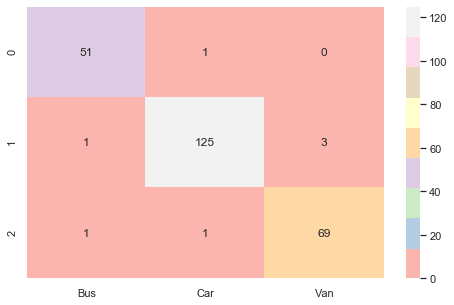

In [2326]:
# Plotting confusion matrix graphically

cm5 = metrics.confusion_matrix(y_test, y_pr, labels=[0,1,2])
df_cm5 = pd.DataFrame(cm5, index = [i for i in ['0','1','2']],
                    columns = [i for i in ['Bus','Car','Van']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm5, annot=True, cmap = 'Pastel1', fmt = 'g');

### D. K-FOLD Model Building On Scaled Data.

### 1. K-Fold on Linear SVM

In [2329]:
kfold1  = KFold(n_splits = 10, random_state = 1, shuffle = True)

svm = SVC(kernel = 'linear')

res1 = cross_val_score(estimator = svm, X = x_train, y = y_train.values.ravel(), cv = kfold1)     # Training model on scaled data

print(res1, '\n')
print('Kfold Accuracy Scaled Data :{}'.format(res1.mean()*100))
print('Kfold Score STD Scaled Data :{}'.format(res1.std()*100))
print()
print('Accuracy Scaled Data %0.2f (+/- %0.2f)' %(res1.mean()*100, res1.std()*100*2))

[0.94915254 0.91525424 0.93220339 0.96610169 0.96610169 0.94915254
 0.93220339 0.87931034 0.96551724 0.9137931 ] 

Kfold Accuracy Scaled Data :93.68790181180596
Kfold Score STD Scaled Data :2.6810113859306868

Accuracy Scaled Data 93.69 (+/- 5.36)


### 2. K-Fold on RBF SVM

In [2334]:
kfold2 = KFold(n_splits = 10, random_state = 1, shuffle = True)

svm = SVC(kernel = 'rbf')

res2 = cross_val_score(estimator = svm, X = x_train, y = y_train.values.ravel(), cv = kfold)       # Training model on scaled data

print(res2, '\n')
print('Kfold Accuracy Scaled Data :{}'.format(res2.mean()*100))
print('Kfold Score STD Scaled Data :{}'.format(res2.std()*100))
print()
print('Accuracy Scaled Data %0.2f (+/- %0.2f)' %(res2.mean()*100, res2.std()*100*2))

[0.94915254 0.94915254 0.93220339 0.98305085 0.94915254 0.91525424
 0.96610169 0.93103448 0.98275862 0.94827586] 

Kfold Accuracy Scaled Data :95.06136762127412
Kfold Score STD Scaled Data :2.076003311760541

Accuracy Scaled Data 95.06 (+/- 4.15)


### 3. K-Fold on Poly SVM

In [2337]:
kfold3 = KFold(n_splits = 10, random_state = 1, shuffle = True)

svm = SVC(kernel = 'poly')

res3 = cross_val_score(estimator = svm, X = x_train, y = y_train.values.ravel(), cv = kfold)      # Training model on scaled data

print(res3, '\n')
print('Kfold Accuracy Scaled Data :{}'.format(res3.mean()*100))
print('Kfold Score STD Scaled Data :{}'.format(res3.std()*100))
print()
print('Accuracy Scaled Data %0.2f (+/- %0.2f)' %(res3.mean()*100, res3.std()*100*2))

[0.86440678 0.88135593 0.79661017 0.84745763 0.94915254 0.74576271
 0.91525424 0.84482759 0.94827586 0.87931034] 

Kfold Accuracy Scaled Data :86.72413793103448
Kfold Score STD Scaled Data :6.0476264323771485

Accuracy Scaled Data 86.72 (+/- 12.10)


### 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data 

In [2345]:
# Creating the covariance matrix

cov_matrix = np.cov(x_sd,rowvar=False)
print("cov_matrix shape:",cov_matrix.shape)
print()
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)

Covariance_matrix [[ 1.00119332e+00  6.85832186e-01  7.88639534e-01  7.18026682e-01
   1.85261472e-01  4.92849389e-01  8.12992299e-01 -7.88040065e-01
   8.13221177e-01  6.75439990e-01  7.71481793e-01  8.11425193e-01
   5.82479894e-01 -2.43434747e-01  1.98734044e-01  1.65643094e-01
   2.92322387e-01  3.58340733e-01]
 [ 6.85832186e-01  1.00119332e+00  7.93549801e-01  6.40902475e-01
   2.02388753e-01  5.61276648e-01  8.51375681e-01 -8.21719469e-01
   8.46625607e-01  9.63772098e-01  8.01157985e-01  8.34766764e-01
   9.27835429e-01  7.03501444e-02  1.37236787e-01 -7.10858343e-03
  -1.10579255e-01  4.26224137e-02]
 [ 7.88639534e-01  7.93549801e-01  1.00119332e+00  7.95789313e-01
   2.40692738e-01  6.64168147e-01  9.06539535e-01 -9.11792018e-01
   8.93681438e-01  7.73718489e-01  8.69730863e-01  8.87810577e-01
   7.05218543e-01 -2.31522525e-01  9.76250870e-02  2.66559783e-01
   1.42288375e-01  3.30305884e-01]
 [ 7.18026682e-01  6.40902475e-01  7.95789313e-01  1.0011

We can notice our covariance matrix has (18) independent features. Hence giving us a matrix (18 x 18)

In [2369]:
# Find Eigen Vecs & Vals

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print()
print('Eigen Vals \n%s', eig_vals)

Eigen Vectors 
%s [[-2.71833485e-01 -8.69648301e-02  3.17320850e-02  1.46921107e-01
  -1.43726422e-01  2.59043456e-01  1.88106978e-01 -7.67111336e-01
  -3.59479490e-01 -1.41872512e-01 -1.10596052e-01  4.42523323e-03
  -1.34877214e-02 -6.53969724e-02 -6.57937319e-02 -1.01761121e-01
   4.43551633e-02  4.03920334e-02]
 [-2.87752152e-01  1.29569025e-01  2.05060218e-01 -3.91180151e-02
   1.35648072e-01 -6.68904998e-02 -3.89272894e-01 -6.59305812e-02
  -5.39474499e-02  2.00944343e-01  2.64030911e-02  1.17912288e-01
  -5.48371790e-02 -5.48070200e-02 -3.62212838e-01  7.75768765e-02
  -6.33475398e-01  2.75078142e-01]
 [-3.02207649e-01 -4.90337225e-02 -6.22374223e-02  1.07283978e-01
   8.29186412e-02 -1.71691658e-02  1.64976106e-01  2.75455475e-01
  -1.07743999e-01 -1.21184434e-01 -6.11930008e-01  5.75519483e-01
  -3.30803769e-03  1.44136869e-01  5.95907654e-02  1.54063878e-01
   4.79322914e-03 -2.34142620e-02]
 [-2.69577529e-01 -1.97920325e-01 -5.60151644e-02 -2.55692470e-01
  -1.33683894e-01 -

In [2354]:
# The "cumulative variance explained" analysis 

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
print('Cummulative Variance Explained', cum_var_exp)

Cummulative Variance Explained [ 54.09223696  72.71231181  79.34936013  85.65979515  90.59797978
  94.30241626  96.06748302  97.34884084  98.04722219  98.48195779
  98.89321935  99.23898302  99.45530349  99.63005091  99.78736252
  99.88813456  99.98271143 100.        ]


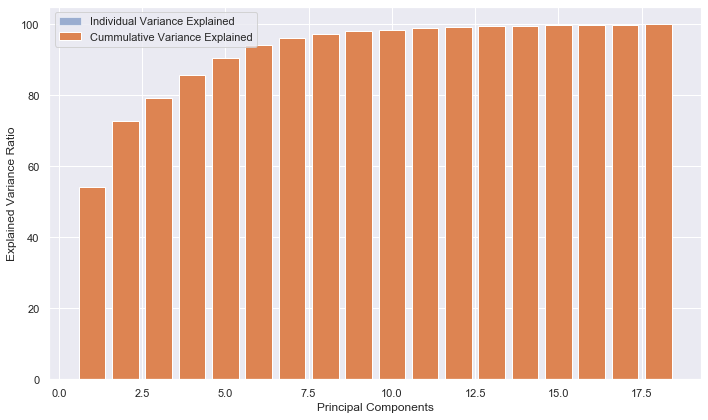

In [2358]:
# Plotting the variance expalained by the principal components and the cumulative variance explained

plt.figure(figsize=(10,6))
plt.bar(range(1, eig_vals.size + 1), var_exp, align = 'center', alpha = 0.5, label = 'Individual Variance Explained')
plt.bar(range(1, eig_vals.size + 1), cum_var_exp, label = 'Cummulative Variance Explained')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc = 'best')
plt.tight_layout()

In [2371]:
# Find Eigen Vecs & Vals from the above covariance matrix

pca = PCA(n_components=18)
pca.fit(x_sd)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [2364]:
pca.explained_variance_ratio_

array([5.40922370e-01, 1.86200749e-01, 6.63704832e-02, 6.31043501e-02,
       4.93818463e-02, 3.70443648e-02, 1.76506676e-02, 1.28135782e-02,
       6.98381342e-03, 4.34735600e-03, 4.11261558e-03, 3.45763671e-03,
       2.16320470e-03, 1.74747422e-03, 1.57311615e-03, 1.00772036e-03,
       9.45768675e-04, 1.72885734e-04])

In [2365]:
pca.explained_variance_

array([9.74822151e+00, 3.35561301e+00, 1.19609432e+00, 1.13723377e+00,
       8.89933942e-01, 6.67594269e-01, 3.18091149e-01, 2.30919640e-01,
       1.25858652e-01, 7.83457880e-02, 7.41154183e-02, 6.23117299e-02,
       3.89841495e-02, 3.14920712e-02, 2.83498808e-02, 1.81606120e-02,
       1.70441510e-02, 3.11565675e-03])

In [2366]:
pca.components_

array([[ 2.71833485e-01,  2.87752152e-01,  3.02207649e-01,
         2.69577529e-01,  9.62127499e-02,  1.94213350e-01,
         3.11006497e-01, -3.08920578e-01,  3.07627719e-01,
         2.78168684e-01,  3.00103184e-01,  3.06915636e-01,
         2.63440854e-01, -4.04541377e-02,  3.57256863e-02,
         6.00790219e-02,  3.51243391e-02,  8.21106132e-02],
       [-8.69648301e-02,  1.29569025e-01, -4.90337225e-02,
        -1.97920325e-01, -2.55974478e-01, -1.09397968e-01,
         7.37892320e-02, -1.16146579e-02,  8.73500369e-02,
         1.20278205e-01,  7.57269266e-02,  7.11321935e-02,
         2.08672956e-01,  5.04680072e-01, -1.64454868e-02,
        -9.29410465e-02, -5.02254147e-01, -5.08621957e-01],
       [-3.17320850e-02, -2.05060218e-01,  6.22374223e-02,
         5.60151644e-02, -6.31765132e-02, -1.59070485e-01,
         1.08432599e-01, -9.43776553e-02,  1.06603517e-01,
        -2.18089748e-01,  1.46740550e-01,  1.10191624e-01,
        -2.04852499e-01,  7.70228381e-02, -5.54383540e

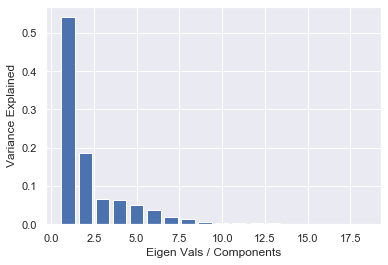

In [2367]:
plt.bar(list(range(1,19)), pca.explained_variance_ratio_)
plt.xlabel('Eigen Vals / Components')
plt.ylabel('Variance Explained')
plt.show()

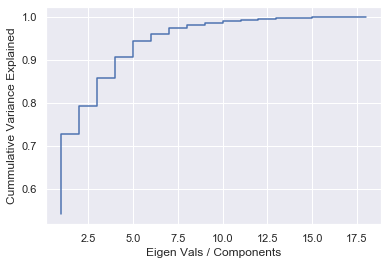

In [2368]:
plt.step(list(range(1,19)), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Vals / Components')
plt.ylabel('Cummulative Variance Explained')
plt.show()

From above we can see that 8 dimension are able to explain 95% variance of data. so we will use first 8 principal components.

In [2373]:
pca8 = PCA(n_components = 8)       # Using first 8 components
pca8.fit(x_sd)
scaled_pca8 = pca8.transform(x_sd)      # Transforming 18 dimensions into 8 

In [2376]:
scaled_pca8.shape

(839, 8)

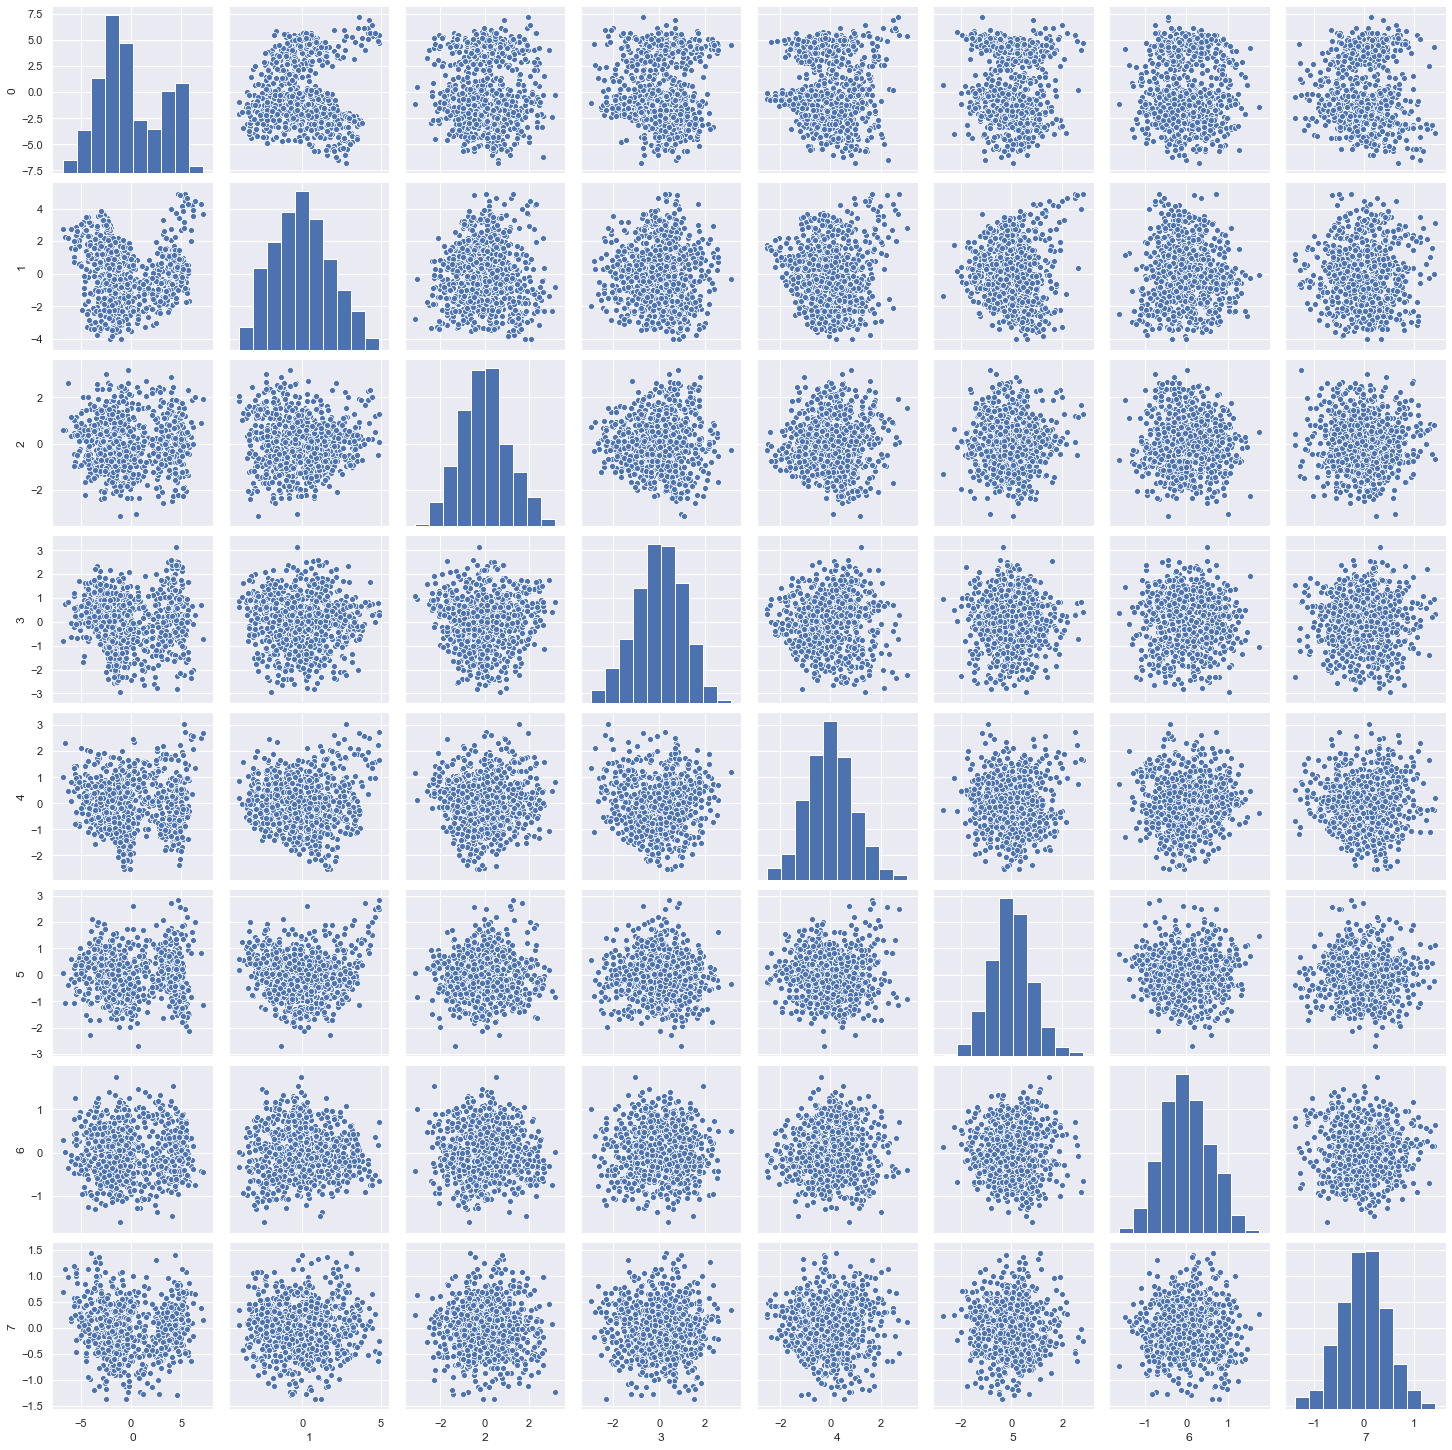

In [2378]:
# Visual analysis of the 8 dimensions

sns.pairplot(pd.DataFrame(scaled_pca8)); 

### 7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier

In [2383]:
pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(scaled_pca8, y, test_size = 0.30, random_state = 1)

In [2384]:
print("shape of pca_x_train",pca_X_train.shape)
print("shape of pca_y_train",pca_y_train.shape)
print("shape of pca_x_test",pca_X_test.shape)
print("shape of pca_y_test",pca_y_test.shape)

shape of pca_x_train (587, 8)
shape of pca_y_train (587, 1)
shape of pca_x_test (252, 8)
shape of pca_y_test (252, 1)


### E. SVM Model Building On Scaled PCA Data.

### 1. PCA Linear Model Building

In [2420]:
svmlin2 = SVC(C = 4, gamma = 0.025, kernel = 'linear', random_state=1)
svmlin2.fit(pca_x_train, pca_y_train.values.ravel())           # Fitting model on PCA training data

SVC(C=4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [2421]:
svmlin2.score(pca_x_train, pca_y_train)      # PCA Training data score

0.8858603066439523

In [2423]:
svmlin2.score(pca_x_test, pca_y_test)      # PCA Training data score

0.876984126984127

In [2465]:
y_pred1 = svmlin2.predict(pca_x_test)
svmlin2_acc = accuracy_score(pca_y_test, y_pred1)       # Getting accuracy score of model on PCA test data 
svmlin2_conf = confusion_matrix(pca_y_test, y_pred1)    # Visualizing confusion matrix of the PCA model   
svmlin2_class = classification_report(pca_y_test, y_pred1)        # Visualizing classification report of the PCA model

In [2466]:
print('The PCA Accuracy Score of the model is {0:.2f}%'. format(svmlin2_acc*100))
print()
print('The Confusion Matrix of the model is :\n', svmlin2_conf)
print()
print('The Classification Report of the model is :\n', svmlin2_class)

The PCA Accuracy Score of the model is 87.70%

The Confusion Matrix of the model is :
 [[ 48   3   1]
 [ 12 110   7]
 [  3   5  63]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.76      0.92      0.83        52
         1.0       0.93      0.85      0.89       129
         2.0       0.89      0.89      0.89        71

    accuracy                           0.88       252
   macro avg       0.86      0.89      0.87       252
weighted avg       0.88      0.88      0.88       252



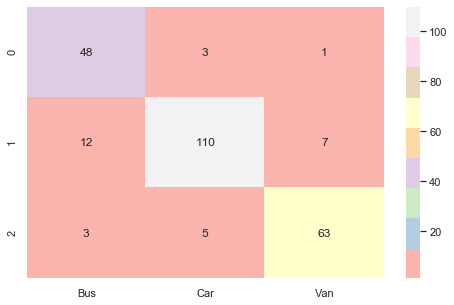

In [2467]:
# Plotting confusion matrix graphically

cm6 = metrics.confusion_matrix(pca_y_test, y_pred1, labels=[0,1,2])
df_cm6 = pd.DataFrame(cm6, index = [i for i in ['0','1','2']],
                    columns = [i for i in ['Bus','Car','Van']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm6, annot=True, cmap = 'Pastel1', fmt = 'g');

### 2. PCA RBF Model Building

In [2468]:
svmrbf2 = SVC(C = 8, gamma = 0.035, kernel = 'rbf', random_state=1)
svmrbf2.fit(pca_x_train, pca_y_train.values.ravel())         # Fitting model on PCA training data 

SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.035, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [2469]:
svmrbf2.score(pca_x_train, pca_y_train)        # PCA Training data score

0.969335604770017

In [2470]:
svmrbf2.score(pca_x_test, pca_y_test)          # PCA Testing data score

0.9523809523809523

In [2471]:
y_pre1 = svmrbf2.predict(pca_x_test)
svmrbf2_acc = accuracy_score(pca_y_test, y_pre1)        # Getting accuracy score of PCA model on test data
svmrbf2_conf = confusion_matrix(pca_y_test, y_pre1)     # Visualizing confusion matrix of the PCA model
svmrbf2_class = classification_report(pca_y_test, y_pre1)       # Visualizing classification report of the PCA model

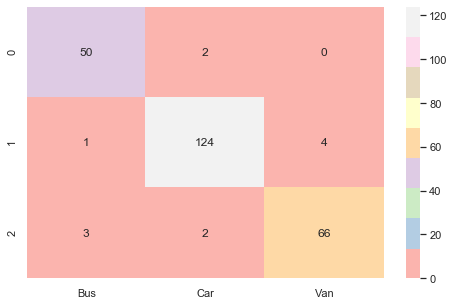

In [2472]:
# Plotting confusion matrix graphically

cm7 = metrics.confusion_matrix(pca_y_test, y_pre1, labels=[0,1,2])
df_cm7 = pd.DataFrame(cm7, index = [i for i in ['0','1','2']],
                    columns = [i for i in ['Bus','Car','Van']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm7, annot=True, cmap = 'Pastel1', fmt = 'g');

### 3. PCA Poly Model Building

In [2498]:
svmpoly2 = SVC(C = 170, gamma = 0.025, kernel = 'poly', random_state = 1)
svmpoly2.fit(pca_x_train, pca_y_train.values.ravel())          # Fitting model on PCA training data        

SVC(C=170, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [2499]:
svmpoly2.score(pca_x_train, pca_y_train)       # PCA Training data score

0.948892674616695

In [2500]:
svmpoly2.score(pca_x_test, pca_y_test)       # PCA Testing data score

0.9166666666666666

In [2503]:
y_pr1 = svmpoly2.predict(pca_x_test)
svmpoly2_acc = accuracy_score(pca_y_test, y_pr1)        # Getting accuracy score of PCA model on test data
svmpoly2_conf = confusion_matrix(pca_y_test, y_pr1)     # Visualizing confusion matrix of the PCA model
svmpoly2_class = classification_report(pca_y_test, y_pr1)      # Visualizing classification score of the PCA model       

In [2504]:
print('The Accuracy Score of the model is {0:.2f}%'. format(svmpoly2_acc*100))
print()
print('The Confusion Matrix of the model is :\n', svmpoly2_conf)
print()
print('The Classification Report of the model is :\n', svmpoly2_class)

The Accuracy Score of the model is 91.67%

The Confusion Matrix of the model is :
 [[ 48   3   1]
 [  2 121   6]
 [  1   8  62]]

The Classification Report of the model is :
               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93        52
         1.0       0.92      0.94      0.93       129
         2.0       0.90      0.87      0.89        71

    accuracy                           0.92       252
   macro avg       0.92      0.91      0.91       252
weighted avg       0.92      0.92      0.92       252



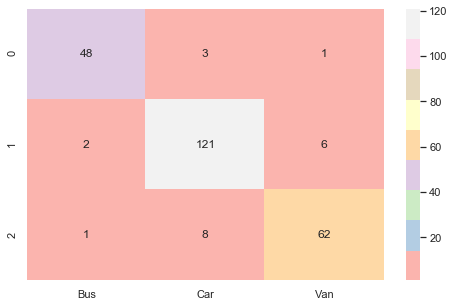

In [2506]:
# Plotting confusion matrix graphically

cm8 = metrics.confusion_matrix(pca_y_test, y_pr1, labels=[0,1,2])
df_cm8 = pd.DataFrame(cm8, index = [i for i in ['0','1','2']],
                    columns = [i for i in ['Bus','Car','Van']])

plt.figure(figsize=(8,5))
sns.heatmap(df_cm8, annot=True, cmap = 'Pastel1', fmt = 'g');

### F. K-FOLD Model Building On PCA Scaled Data.

### 1. K-Fold on PCA Scaled Linear Model

In [2509]:
kfold4  = KFold(n_splits = 10, random_state = 1, shuffle = True)

svm = SVC(kernel = 'linear')

res4 = cross_val_score(estimator = svm, X = pca_x_train, y = pca_y_train.values.ravel(), cv = kfold4)     # Training model on PCA scaled data

print(res4, '\n')
print('Kfold Accuracy Scaled Data :{}'.format(res4.mean()*100))
print('Kfold Score STD Scaled Data :{}'.format(res4.std()*100))
print()
print('Accuracy Scaled Data %0.2f (+/- %0.2f)' %(res4.mean()*100, res4.std()*100*2))

[0.86440678 0.89830508 0.84745763 0.84745763 0.89830508 0.86440678
 0.89830508 0.86206897 0.87931034 0.82758621] 

Kfold Accuracy Scaled Data :86.8760958503799
Kfold Score STD Scaled Data :2.327139935857694

Accuracy Scaled Data 86.88 (+/- 4.65)


### 2. K-Fold on PCA Scaled RBF Model

In [2511]:
kfold5  = KFold(n_splits = 10, random_state = 1, shuffle = True)

svm = SVC(kernel = 'rbf')

res5 = cross_val_score(estimator = svm, X = pca_x_train, y = pca_y_train.values.ravel(), cv = kfold5)     # Training model on PCA scaled data

print(res5, '\n')
print('Kfold Accuracy Scaled Data :{}'.format(res5.mean()*100))
print('Kfold Score STD Scaled Data :{}'.format(res5.std()*100))
print()
print('Accuracy Scaled Data %0.2f (+/- %0.2f)' %(res5.mean()*100, res5.std()*100*2))

[0.93220339 0.96610169 0.91525424 0.98305085 0.91525424 0.93220339
 0.93220339 0.9137931  0.96551724 0.96551724] 

Kfold Accuracy Scaled Data :94.21098772647574
Kfold Score STD Scaled Data :2.426166873986019

Accuracy Scaled Data 94.21 (+/- 4.85)


### ### 3. K-Fold on PCA Scaled Poly Model

In [2524]:
kfold6  = KFold(n_splits = 10, random_state = 1, shuffle = True)

svm = SVC(kernel = 'poly')

res6 = cross_val_score(estimator = svm, X = pca_x_train, y = pca_y_train.values.ravel(), cv = kfold6)     # Training model on PCA scaled data

print(res6, '\n')
print('Kfold Accuracy Scaled Data :{}'.format(res6.mean()*100))
print('Kfold Score STD Scaled Data :{}'.format(res6.std()*100))
print()
print('Accuracy Scaled Data %0.2f (+/- %0.2f)' %(res6.mean()*100, res6.std()*100*2))

[0.84745763 0.81355932 0.76271186 0.77966102 0.93220339 0.71186441
 0.88135593 0.79310345 0.86206897 0.84482759] 

Kfold Accuracy Scaled Data :82.28813559322032
Kfold Score STD Scaled Data :6.064539104599164

Accuracy Scaled Data 82.29 (+/- 12.13)


### 8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings

In [2525]:
# Comparing all models

df_compare = pd.DataFrame({'Algorithm':['Linear SVM (Raw Data)', 'RBF SVM (Raw Data)', 'Poly SVM (Raw Data)', 'K-FOLD Linear (Raw Data)', 'K-FOLD RBF (Raw Data)', 'K-FOLD Poly (Raw Data)', 'Linear SVM (Scaled Data)', 'RBF SVM (Scaled Data)', 'Poly SVM (Scaled Data)', 'K-FOLD Linear (Scaled Data)', 'K-FOLD RBF (Scaled Data)', 'K-FOLD Poly (Scaled Data)', 'Linear SVM (PCA Data)', 'RBF SVM (PCA Data)', 'Poly SVM(PCA Data)', 'K-Fold Linear (PCA Data)', 'K-Fold RBF (PCA Data)', 'K-Fold Poly (PCA Data)'],
                        'Accuracy Score (%)':[svmlin_acc*100,svmrbf_acc*100,svmpoly_acc*100,res.mean()*100, result.mean()*100, result1.mean()*100, svmlin1_acc*100, svmrbf1_acc*100, svmpoly1_acc*100, res1.mean()*100, res2.mean()*100, res3.mean()*100, svmlin2_acc*100, svmrbf2_acc*100, svmpoly2_acc*100, res4.mean()*100, res5.mean()*100, res6.mean()*100]})    # Pulling out accuracy score of all models    
print("Following table shows comparison of various models")
df_compare

Following table shows comparison of various models


Algorithm  Accuracy Score (%)
0         Linear SVM (Raw Data)           95.238095
1            RBF SVM (Raw Data)           92.460317
2           Poly SVM (Raw Data)           95.238095
3      K-FOLD Linear (Raw Data)           92.486850
4         K-FOLD RBF (Raw Data)           66.464056
5        K-FOLD Poly (Raw Data)           71.738749
6      Linear SVM (Scaled Data)           95.634921
7         RBF SVM (Scaled Data)           97.619048
8        Poly SVM (Scaled Data)           97.222222
9   K-FOLD Linear (Scaled Data)           93.687902
10     K-FOLD RBF (Scaled Data)           95.061368
11    K-FOLD Poly (Scaled Data)           86.724138
12        Linear SVM (PCA Data)           87.698413
13           RBF SVM (PCA Data)           95.238095
14           Poly SVM(PCA Data)           91.666667
15     K-Fold Linear (PCA Data)           86.876096
16        K-Fold RBF (PCA Data)           94.210988
17       K-Fold Poly (PCA Data)           82.288136

We can observe from the above result that "RBF SVM (Scaled Data) Model" has:

1. Accuracy Score (97.62%)
2. Recall Score (0 - Bus(98%), 1 - Car(96%), 2 - Van(100%)
3. Precision Score (0 - Bus(98%), 1 - Car(99%), 2 - Van(95%)

-------- Whereas "Poly SVM (Scaled Data)" has :

1. Accuracy Score (97.22%)
2. Recall Score (0 - Bus(98%), 1 - Car(97%), 2 - Van(97%)
3. Precision Score (0 - Bus(96%), 1 - Car(98%), 2 - Van(96%)

From the above analysis both models are almost similar but we should go with "RBF SVM (Scaled Data) Model" as the ('Precison Score') & ('Recall Score') for (Car, Bus & Van) are higher which plays an important role in data analysis. Though the Poly SVM (Scaled Data) Model" has higher or similar scores on one or two other parameters.


With reference to the K-Fold Crossvalidation we can infer that the "K-Fold RBF (Scaled Data) Model" outperformes the other K-Fold Crossvalidation techniques with an "Accuracy Score" of (95.06%). Hence we choose this model in K-Fold Crossvalidation.